
## Time Series GPTs

* UCI Time series data 



## Libraries


In [1]:

## !pip install pandas
## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend
## !pip install fastdtw



In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
## from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR
import json
import os
import copy




In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

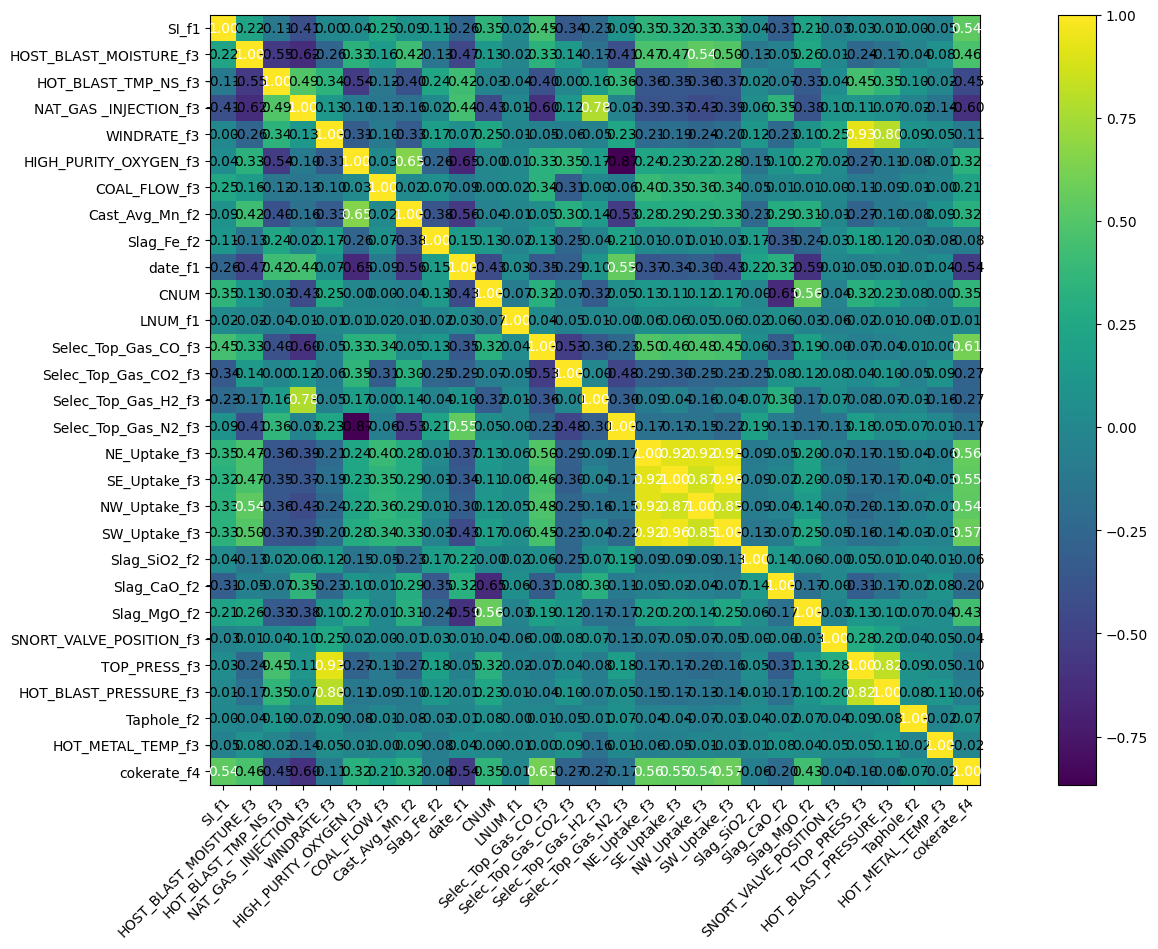

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## UCI data


In [15]:

## tsDataWrangling_obj.read_UCI_data()


In [16]:

## tsDataWrangling_obj.UCI_Energy_data_df 


In [17]:

## tsDataWrangling_obj.format_appliances_data_to_match_CIVS()


In [18]:

## tsDataWrangling_obj.UCI_Energy_data_df


In [19]:

## print(list(tsDataWrangling_obj.UCI_Energy_data_df.columns))   


In [20]:

## tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.UCI_Energy_data_df



## Correlation Matrix


In [21]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI','mov_avg_SI','SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3', 'COAL_FLOW_f3', 
                        'Cast_Avg_Mn_f2', 'Slag_Fe_f2',  'CNUM',  'Selec_Top_Gas_CO_f3',
                        'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 
                        'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 'Slag_SiO2_f2', 'Slag_CaO_f2', 
                        'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 'HOT_BLAST_PRESSURE_f3', 
                        'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [22]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

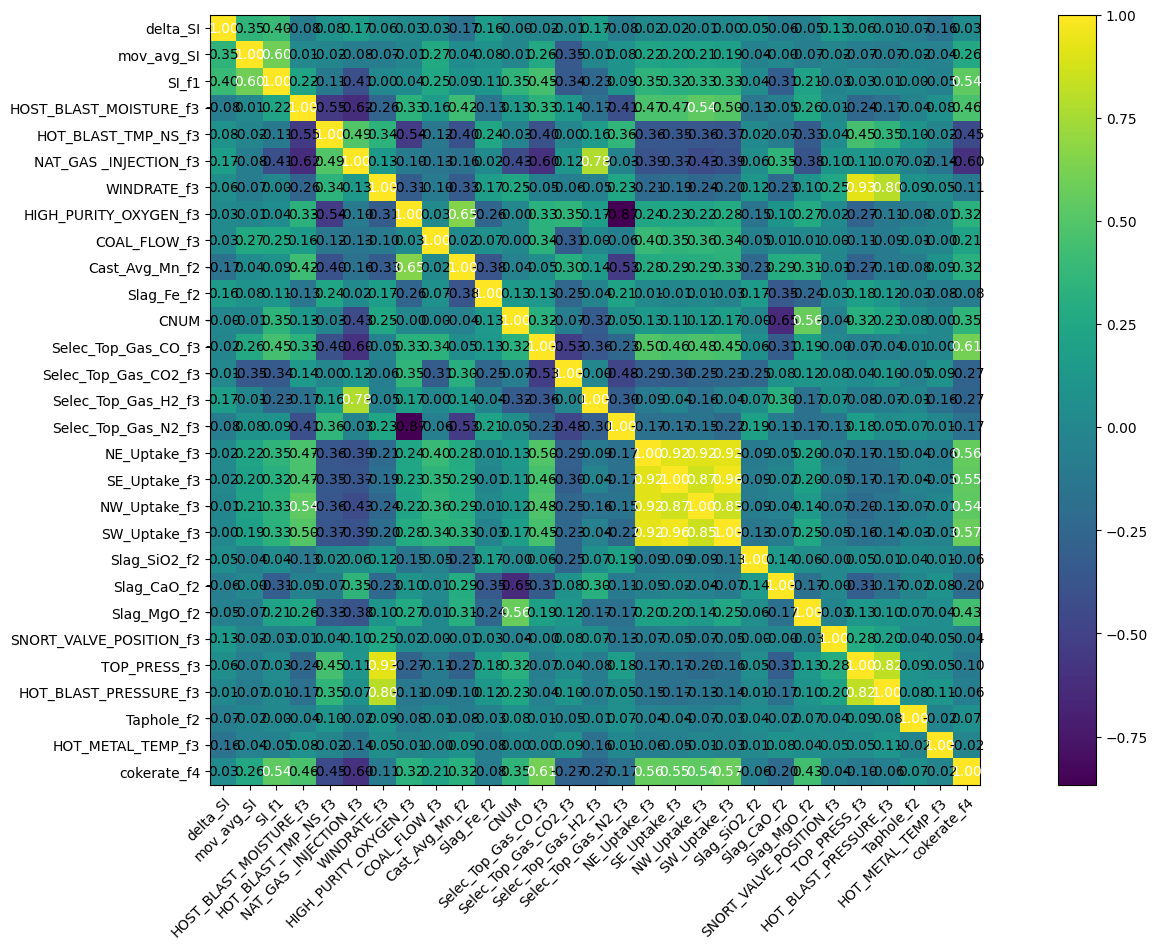

In [23]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [24]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [25]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [26]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [27]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [28]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [29]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        ## loss_SI     = F.mse_loss(    pred_si, y_si   )
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        ## loss_total  = alpha * loss_SI + (1 - alpha) * loss_all 
        
        ## alpha      = 0.9
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        ###################################################################################
        
        which_last = -1    ## -1 for 10, -3 for 8
        
        main_loss       = criterion(idx_pred[:, :], yb[:, :])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, which_last])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 50 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
        
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled





## Train on Train, Test on Test


In [30]:

inferenceGPT_obj.initialize_preds_lists()
inferenceGPT_obj.DPO_initialize_preds_lists()



## Run 1


In [31]:

( 
  chunk400to500_train, 
  chunk300to500_train, 
  chunk200to500_train, 
  chunk100to500_train, 
  chunk000to500_train, 
  test_CIVS
) = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.265522
Loss_SI: 1.572910189628601 Loss_all: 1.2590856552124023
===
[50] Train Loss: 0.326470
Loss_SI: 0.2854885756969452 Loss_all: 0.3189142644405365
===


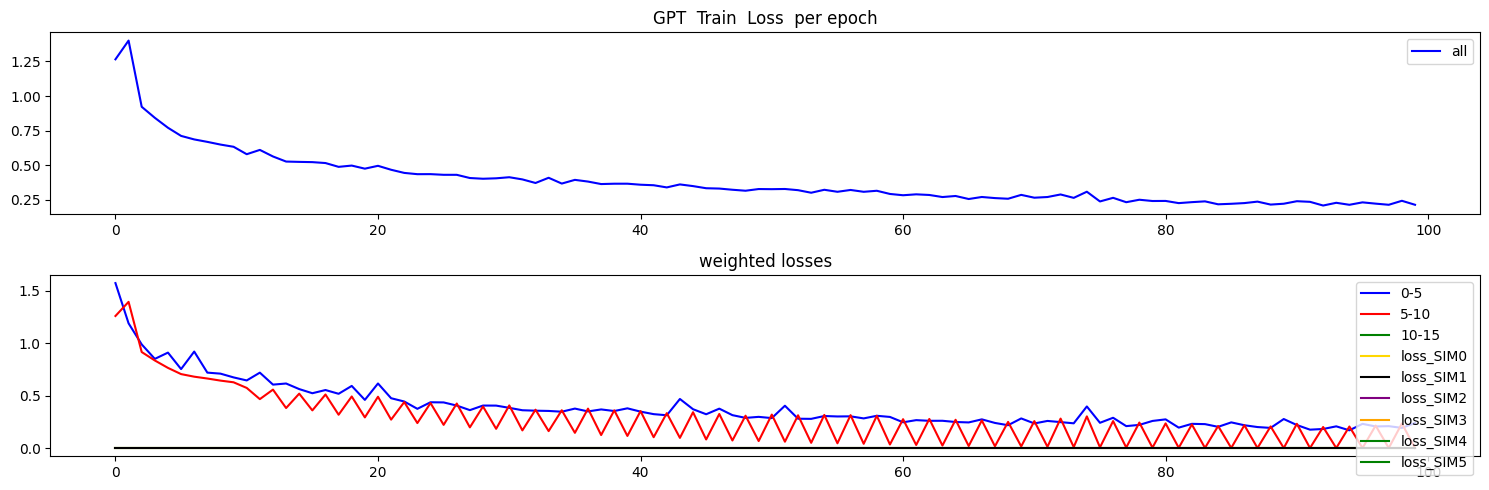

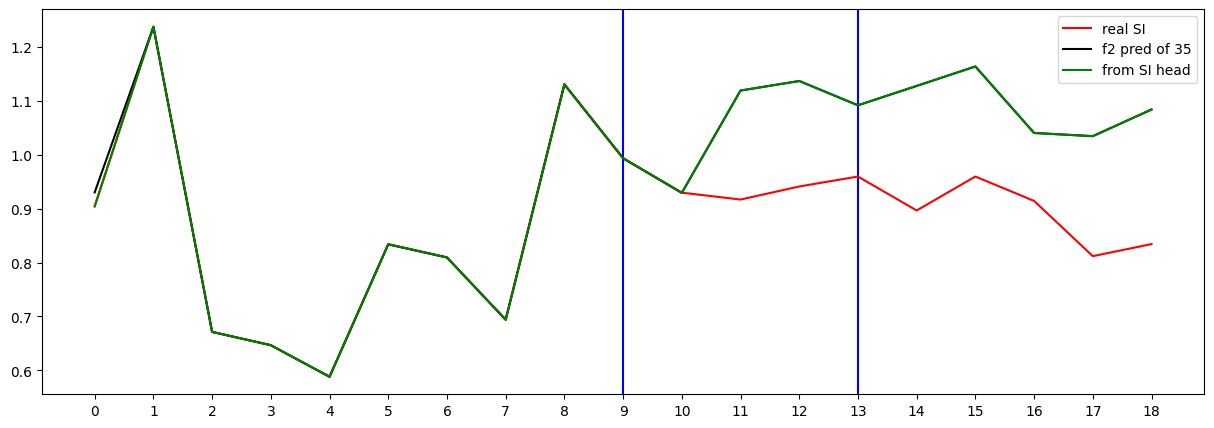

Testing R**2 - (all) - (no inputs):  0.8644877850096968
Testing R**2 - (f2) - SI full (no inputs):  -13.89769347210968
Testing R**2 - SI head only (no inputs):  -13.89769347210968
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.5891346951079872
3 ...t step R**2 (no inputs):  -0.8600441639433787
4 ...t step R**2 (no inputs):  -0.5203440975438396
5 ...t step R**2 (no inputs):  -0.7280280248421589
6 ...t step R**2 (no inputs):  -0.7291481688834478
7 ...t step R**2 (no inputs):  -0.7199390945584156
8 ...t step R**2 (no inputs):  -0.742399817363705
0 ...index R**2 (no inputs):  -1.661661111291778
1 ...index R**2 (no inputs):  -0.20086670764847536
2 ...index R**2 (no inputs):  -13.89769347210968
3 ...index R**2 (no inputs):  -125.92341784669593
4 ...index R**2 (no inputs):  -6632.842031148436
5 ...index R**2 (no inputs):  -338.71204913551276
6 ...index R**2 (no inputs):  -33.44491142663678
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**

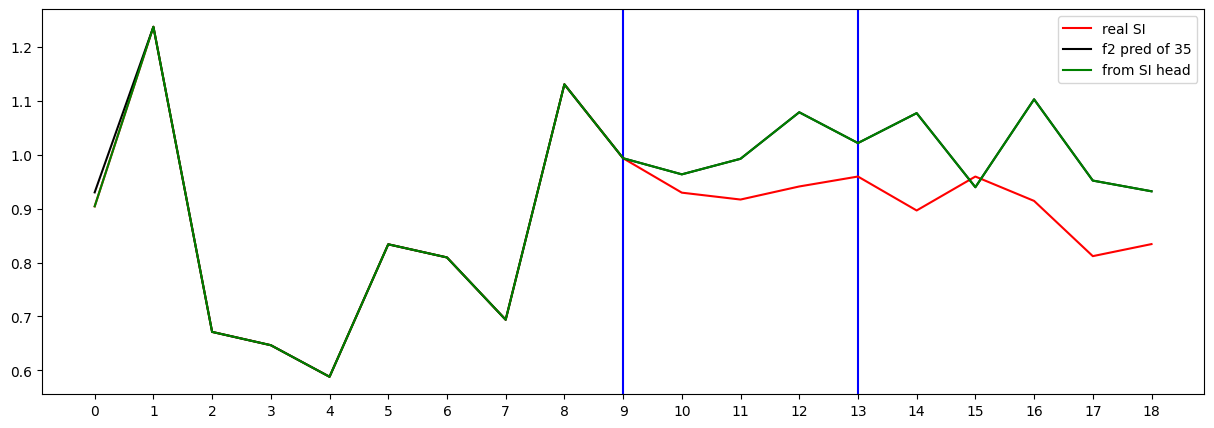

Testing R**2 - (all) - (no inputs):  0.8322822395254972
Testing R**2 - (f2) - SI full (no inputs):  -5.992158062368115
Testing R**2 - SI head only (no inputs):  -5.992158062368115
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.5891346951079872
3 ...t step R**2 (no inputs):  -0.8600441639433787
4 ...t step R**2 (no inputs):  -0.5203440975438396
5 ...t step R**2 (no inputs):  -0.7280280248421589
6 ...t step R**2 (no inputs):  -0.7291481688834478
7 ...t step R**2 (no inputs):  -0.7199390945584156
8 ...t step R**2 (no inputs):  -0.742399817363705
0 ...index R**2 (no inputs):  -1.3815472405894242
1 ...index R**2 (no inputs):  0.09275538481967693
2 ...index R**2 (no inputs):  -5.992158062368115
3 ...index R**2 (no inputs):  -162.43963740307225
4 ...index R**2 (no inputs):  -8571.978575097985
5 ...index R**2 (no inputs):  -419.72576193581295
6 ...index R**2 (no inputs):  -33.63942213904189
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk400to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 

res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, model_DPO , x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_400to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_400to500.append( res_pred )


[0] Train Loss: 1.257706
Loss_SI: 1.2311022281646729 Loss_all: 1.2512643337249756
===
[50] Train Loss: 0.403798
Loss_SI: 0.41055187582969666 Loss_all: 0.39840462803840637
===


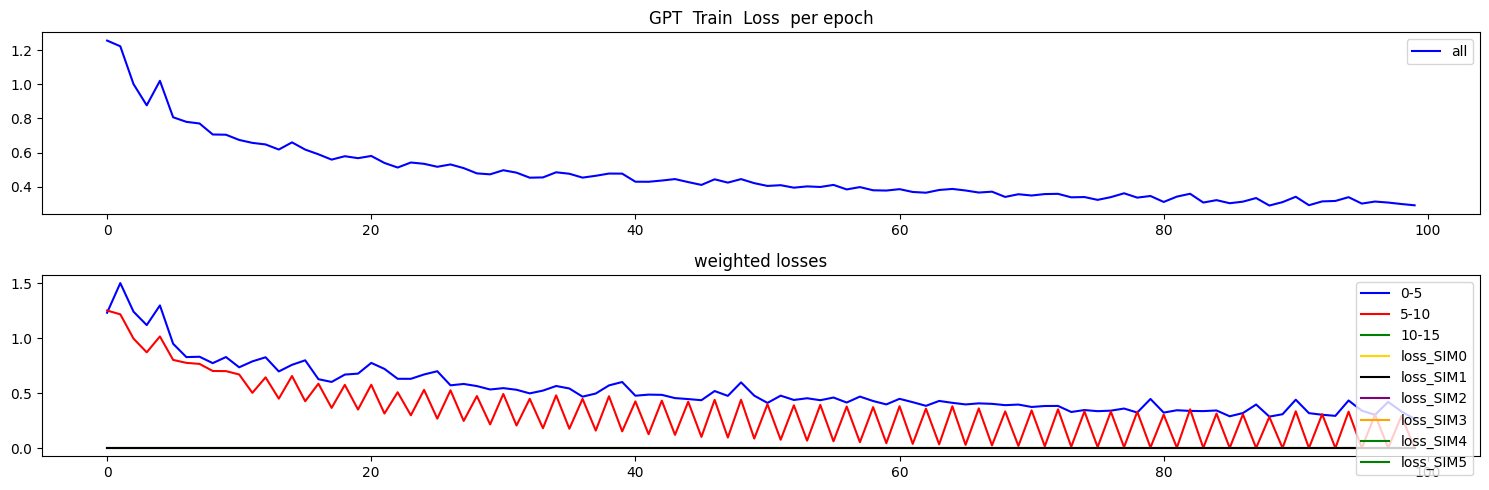

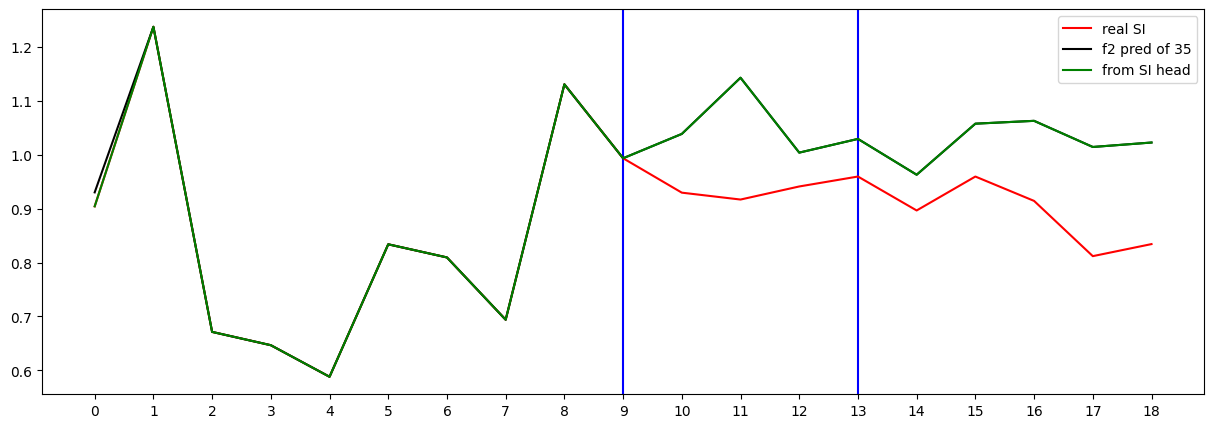

Testing R**2 - (all) - (no inputs):  0.8684130996756845
Testing R**2 - (f2) - SI full (no inputs):  -8.660777103504339
Testing R**2 - SI head only (no inputs):  -8.660777103504339
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.5891346951079872
3 ...t step R**2 (no inputs):  -0.8600441639433787
4 ...t step R**2 (no inputs):  -0.5203440975438396
5 ...t step R**2 (no inputs):  -0.7280280248421589
6 ...t step R**2 (no inputs):  -0.7291481688834478
7 ...t step R**2 (no inputs):  -0.7199390945584156
8 ...t step R**2 (no inputs):  -0.742399817363705
0 ...index R**2 (no inputs):  -1.2682143523627842
1 ...index R**2 (no inputs):  -0.23445885393778298
2 ...index R**2 (no inputs):  -8.660777103504339
3 ...index R**2 (no inputs):  -148.7890354194088
4 ...index R**2 (no inputs):  -9004.173855286508
5 ...index R**2 (no inputs):  -329.1578670242937
6 ...index R**2 (no inputs):  -54.869617694862264
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**

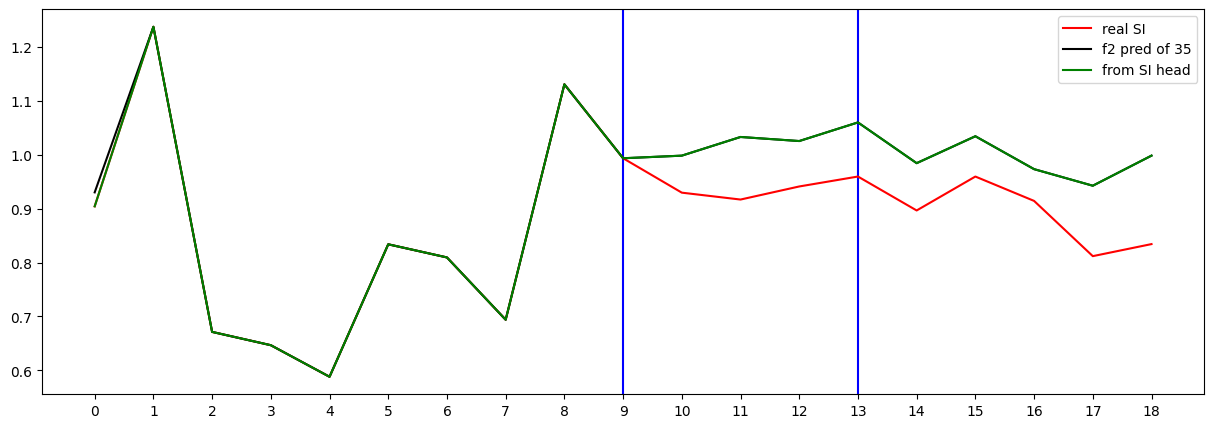

Testing R**2 - (all) - (no inputs):  0.8372018505595196
Testing R**2 - (f2) - SI full (no inputs):  -4.0726893460581355
Testing R**2 - SI head only (no inputs):  -4.0726893460581355
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.5891346951079872
3 ...t step R**2 (no inputs):  -0.8600441639433787
4 ...t step R**2 (no inputs):  -0.5203440975438396
5 ...t step R**2 (no inputs):  -0.7280280248421589
6 ...t step R**2 (no inputs):  -0.7291481688834478
7 ...t step R**2 (no inputs):  -0.7199390945584156
8 ...t step R**2 (no inputs):  -0.742399817363705
0 ...index R**2 (no inputs):  -1.725021201858988
1 ...index R**2 (no inputs):  0.05395952230350454
2 ...index R**2 (no inputs):  -4.0726893460581355
3 ...index R**2 (no inputs):  -206.15243000163724
4 ...index R**2 (no inputs):  -10179.374628502288
5 ...index R**2 (no inputs):  -407.7926604351574
6 ...index R**2 (no inputs):  -57.80606219450497
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_300to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_300to500.append( res_pred )



[0] Train Loss: 1.191998
Loss_SI: 1.2221574783325195 Loss_all: 1.1855331659317017
===
[50] Train Loss: 0.418933
Loss_SI: 0.5475791096687317 Loss_all: 0.4138316214084625
===


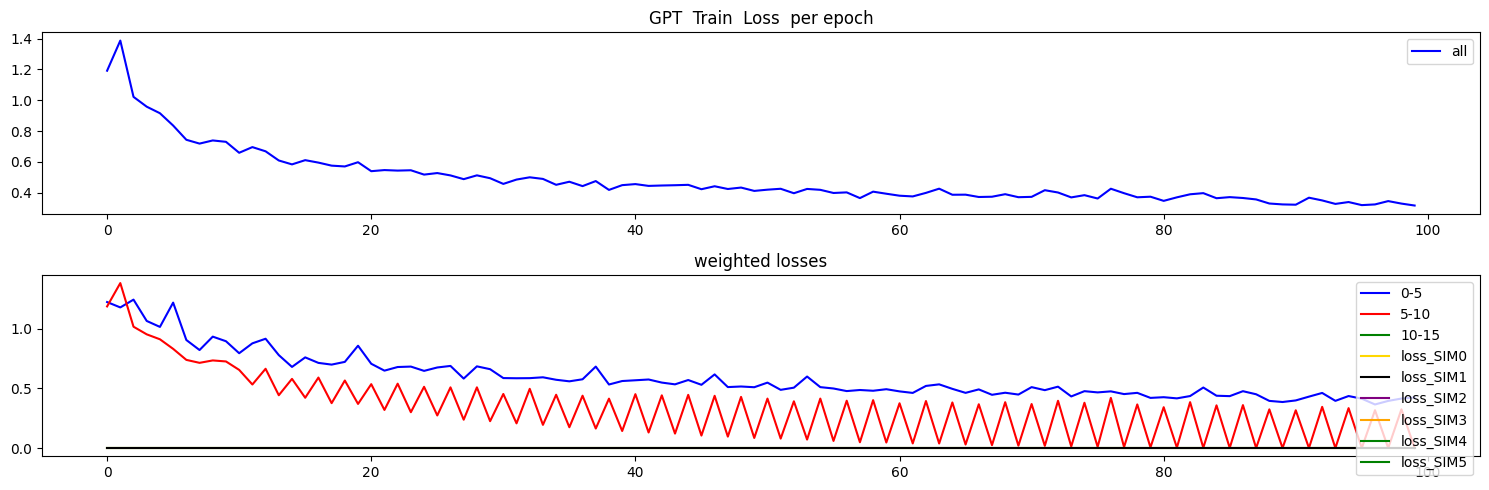

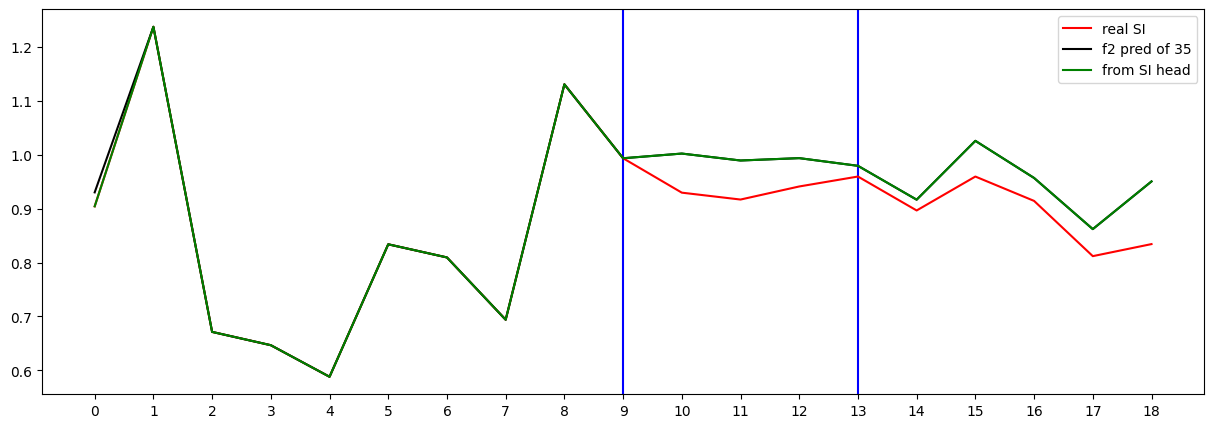

Testing R**2 - (all) - (no inputs):  0.8478000767887568
Testing R**2 - (f2) - SI full (no inputs):  -1.629237751612298
Testing R**2 - SI head only (no inputs):  -1.629237751612298
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.5891346951079872
3 ...t step R**2 (no inputs):  -0.8600441639433787
4 ...t step R**2 (no inputs):  -0.5203440975438396
5 ...t step R**2 (no inputs):  -0.7280280248421589
6 ...t step R**2 (no inputs):  -0.7291481688834478
7 ...t step R**2 (no inputs):  -0.7199390945584156
8 ...t step R**2 (no inputs):  -0.742399817363705
0 ...index R**2 (no inputs):  -1.0600700495097732
1 ...index R**2 (no inputs):  0.3465056459076131
2 ...index R**2 (no inputs):  -1.629237751612298
3 ...index R**2 (no inputs):  -171.02433253473524
4 ...index R**2 (no inputs):  -8344.339898365663
5 ...index R**2 (no inputs):  -381.0729766805831
6 ...index R**2 (no inputs):  -42.506803626152745
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2

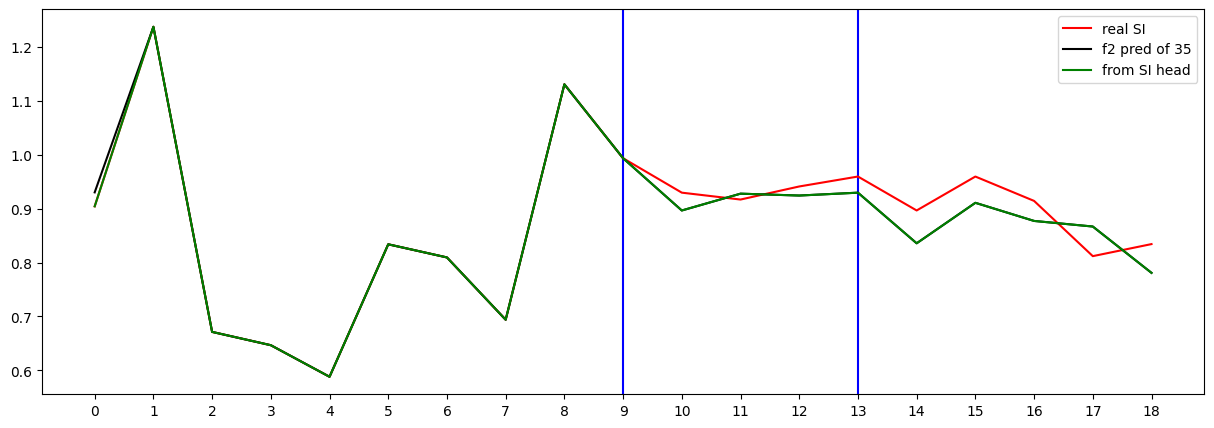

Testing R**2 - (all) - (no inputs):  0.836563754061286
Testing R**2 - (f2) - SI full (no inputs):  -0.8284331399590146
Testing R**2 - SI head only (no inputs):  -0.8284331399590146
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.5891346951079872
3 ...t step R**2 (no inputs):  -0.8600441639433787
4 ...t step R**2 (no inputs):  -0.5203440975438396
5 ...t step R**2 (no inputs):  -0.7280280248421589
6 ...t step R**2 (no inputs):  -0.7291481688834478
7 ...t step R**2 (no inputs):  -0.7199390945584156
8 ...t step R**2 (no inputs):  -0.742399817363705
0 ...index R**2 (no inputs):  -2.076882942972078
1 ...index R**2 (no inputs):  -0.4249518136276824
2 ...index R**2 (no inputs):  -0.8284331399590146
3 ...index R**2 (no inputs):  -176.92568851346772
4 ...index R**2 (no inputs):  -8990.199242903012
5 ...index R**2 (no inputs):  -409.48379324874975
6 ...index R**2 (no inputs):  -54.27613121279247
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R*

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, model_DPO, x_means, x_standard_devs, 9  )
    inferenceGPT_obj.DPO_all_real_si_200to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_200to500.append( res_pred )


[0] Train Loss: 1.147120
Loss_SI: 1.1228240728378296 Loss_all: 1.1401993036270142
===
[50] Train Loss: 0.455071
Loss_SI: 0.5977697372436523 Loss_all: 0.45140743255615234
===


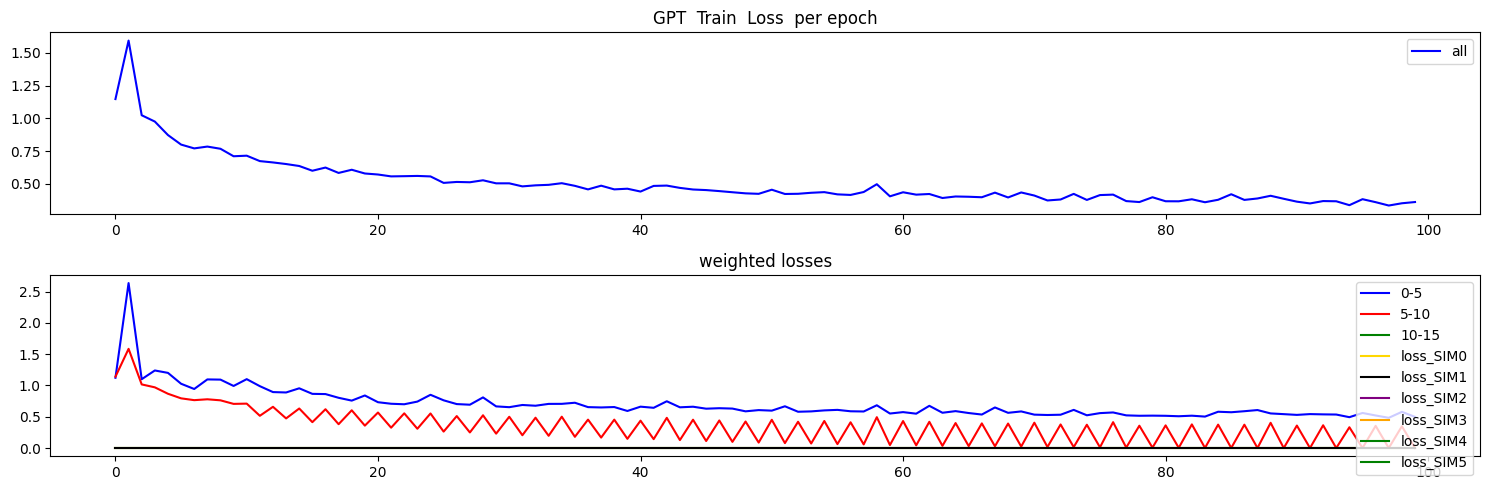

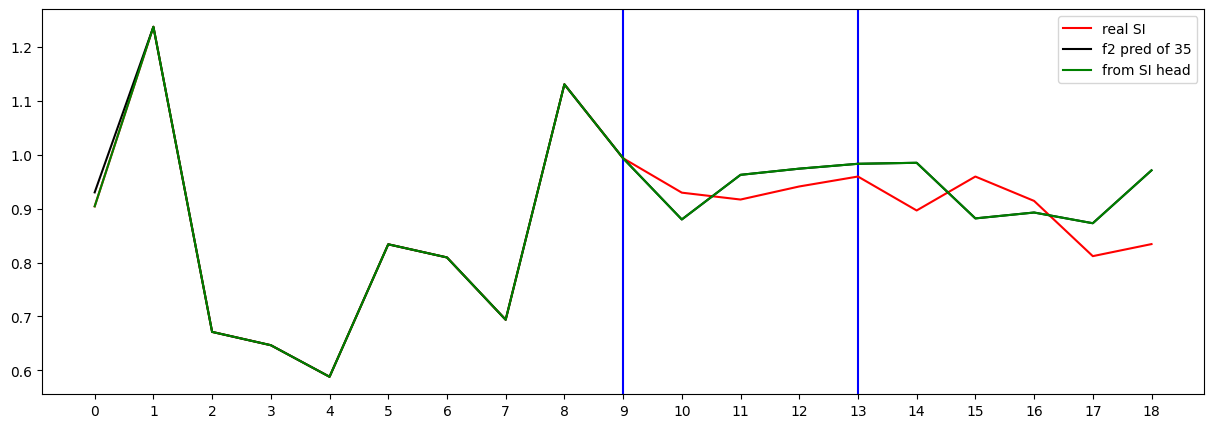

Testing R**2 - (all) - (no inputs):  0.9577747960042485
Testing R**2 - (f2) - SI full (no inputs):  -0.11872838394946994
Testing R**2 - SI head only (no inputs):  -0.11872838394946994
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.5891346951079872
3 ...t step R**2 (no inputs):  -0.8600441639433787
4 ...t step R**2 (no inputs):  -0.5203440975438396
5 ...t step R**2 (no inputs):  -0.7280280248421589
6 ...t step R**2 (no inputs):  -0.7291481688834478
7 ...t step R**2 (no inputs):  -0.7199390945584156
8 ...t step R**2 (no inputs):  -0.742399817363705
0 ...index R**2 (no inputs):  -1.7284684432982083
1 ...index R**2 (no inputs):  0.4076269861223285
2 ...index R**2 (no inputs):  -0.11872838394946994
3 ...index R**2 (no inputs):  -105.17288877848841
4 ...index R**2 (no inputs):  -4237.568951003231
5 ...index R**2 (no inputs):  -104.1615045466247
6 ...index R**2 (no inputs):  -25.38396793157132
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index

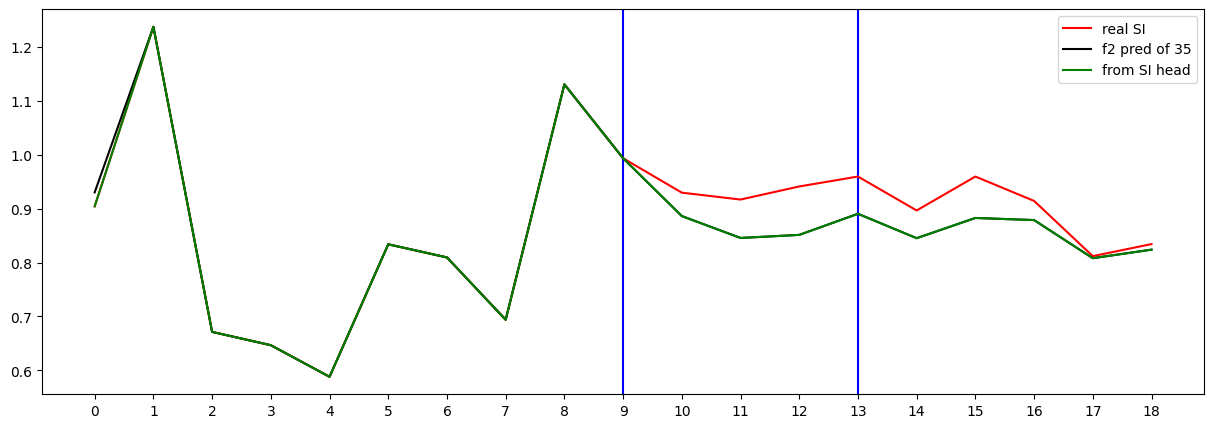

Testing R**2 - (all) - (no inputs):  0.9341161113723688
Testing R**2 - (f2) - SI full (no inputs):  -1.2378052079655966
Testing R**2 - SI head only (no inputs):  -1.2378052079655966
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.5891346951079872
3 ...t step R**2 (no inputs):  -0.8600441639433787
4 ...t step R**2 (no inputs):  -0.5203440975438396
5 ...t step R**2 (no inputs):  -0.7280280248421589
6 ...t step R**2 (no inputs):  -0.7291481688834478
7 ...t step R**2 (no inputs):  -0.7199390945584156
8 ...t step R**2 (no inputs):  -0.742399817363705
0 ...index R**2 (no inputs):  -0.3972840606109833
1 ...index R**2 (no inputs):  -0.2835196158918558
2 ...index R**2 (no inputs):  -1.2378052079655966
3 ...index R**2 (no inputs):  -134.0007097315347
4 ...index R**2 (no inputs):  -5148.749203752729
5 ...index R**2 (no inputs):  -163.79715950127948
6 ...index R**2 (no inputs):  -47.32752892663135
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to500_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_100to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_100to500.append( res_pred )
    
    
    

[0] Train Loss: 1.287081
Loss_SI: 1.3455733060836792 Loss_all: 1.280737280845642
===
[50] Train Loss: 0.467967
Loss_SI: 0.6548209190368652 Loss_all: 0.4645373523235321
===


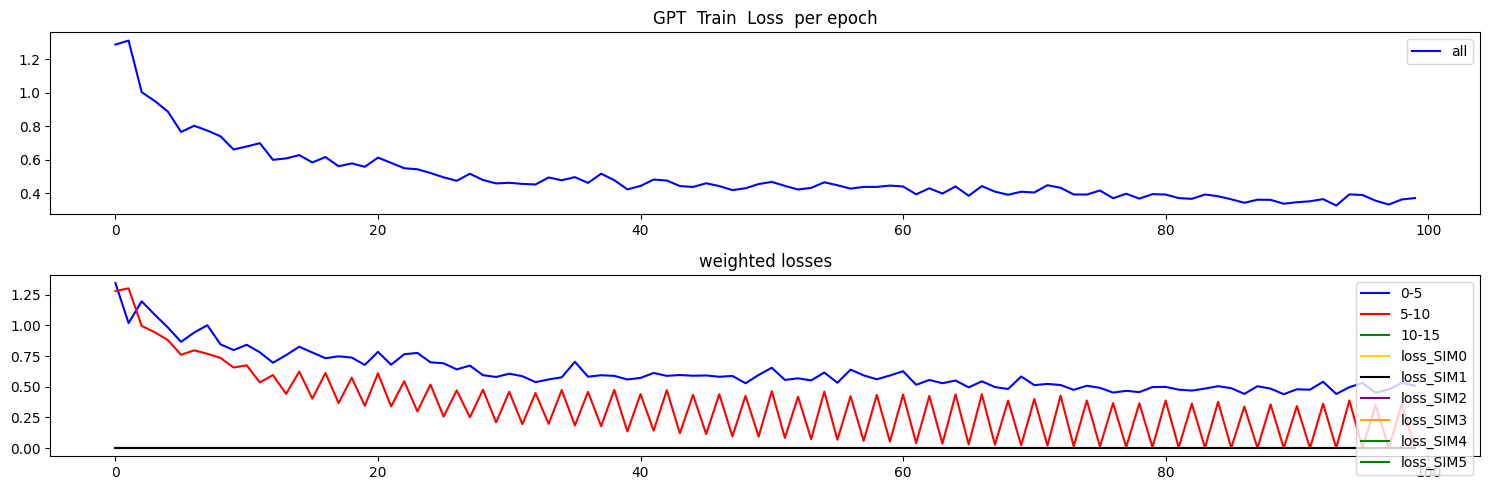

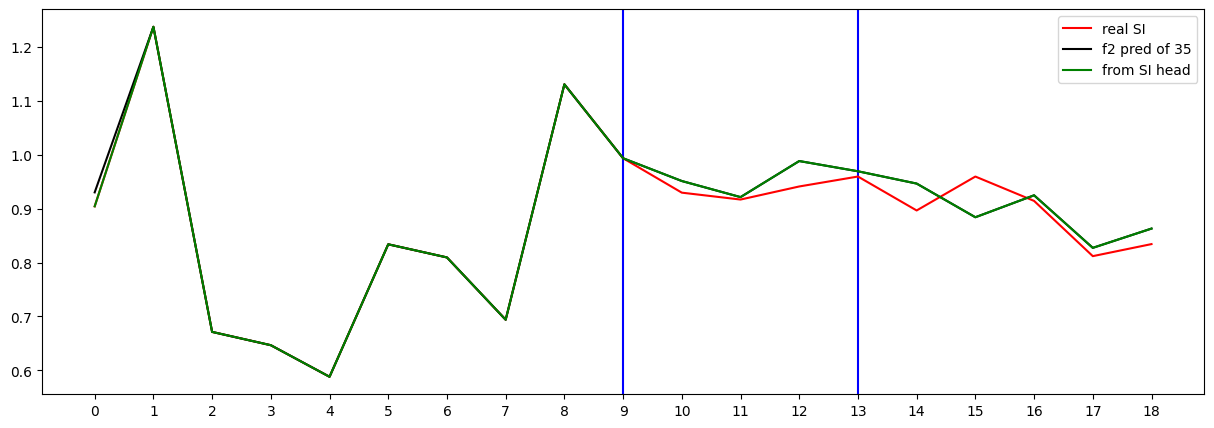

Testing R**2 - (all) - (no inputs):  0.8668736575766556
Testing R**2 - (f2) - SI full (no inputs):  -0.09570912515752794
Testing R**2 - SI head only (no inputs):  -0.09570912515752794
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.5891346951079872
3 ...t step R**2 (no inputs):  -0.8600441639433787
4 ...t step R**2 (no inputs):  -0.5203440975438396
5 ...t step R**2 (no inputs):  -0.7280280248421589
6 ...t step R**2 (no inputs):  -0.7291481688834478
7 ...t step R**2 (no inputs):  -0.7199390945584156
8 ...t step R**2 (no inputs):  -0.742399817363705
0 ...index R**2 (no inputs):  -1.4168563254422595
1 ...index R**2 (no inputs):  0.5176177536813067
2 ...index R**2 (no inputs):  -0.09570912515752794
3 ...index R**2 (no inputs):  -110.00776218932783
4 ...index R**2 (no inputs):  -6672.529000684377
5 ...index R**2 (no inputs):  -332.92987084827814
6 ...index R**2 (no inputs):  -41.341435723335024
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...ind

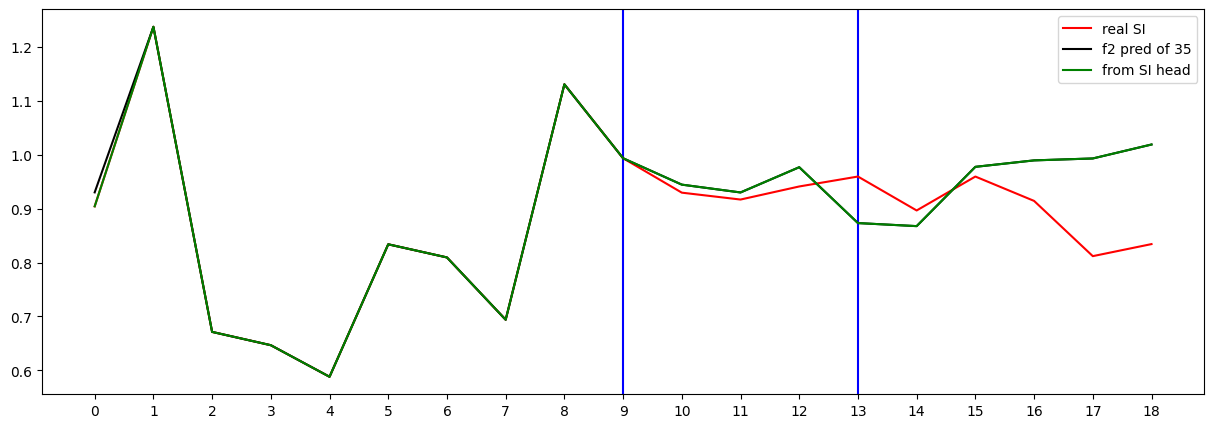

Testing R**2 - (all) - (no inputs):  0.8741867302971822
Testing R**2 - (f2) - SI full (no inputs):  -2.9625949132989486
Testing R**2 - SI head only (no inputs):  -2.9625949132989486
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.5891346951079872
3 ...t step R**2 (no inputs):  -0.8600441639433787
4 ...t step R**2 (no inputs):  -0.5203440975438396
5 ...t step R**2 (no inputs):  -0.7280280248421589
6 ...t step R**2 (no inputs):  -0.7291481688834478
7 ...t step R**2 (no inputs):  -0.7199390945584156
8 ...t step R**2 (no inputs):  -0.742399817363705
0 ...index R**2 (no inputs):  -0.6002699202038462
1 ...index R**2 (no inputs):  -0.1659707435678648
2 ...index R**2 (no inputs):  -2.9625949132989486
3 ...index R**2 (no inputs):  -112.34925593333112
4 ...index R**2 (no inputs):  -5844.921864902878
5 ...index R**2 (no inputs):  -314.55412030582386
6 ...index R**2 (no inputs):  -52.14508976550278
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index 

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_000to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_000to500.append( res_pred )



## Run 2


In [37]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.030440
Loss_SI: 1.3130520582199097 Loss_all: 1.0240508317947388
===
[50] Train Loss: 0.314187
Loss_SI: 0.5146331191062927 Loss_all: 0.3077147603034973
===


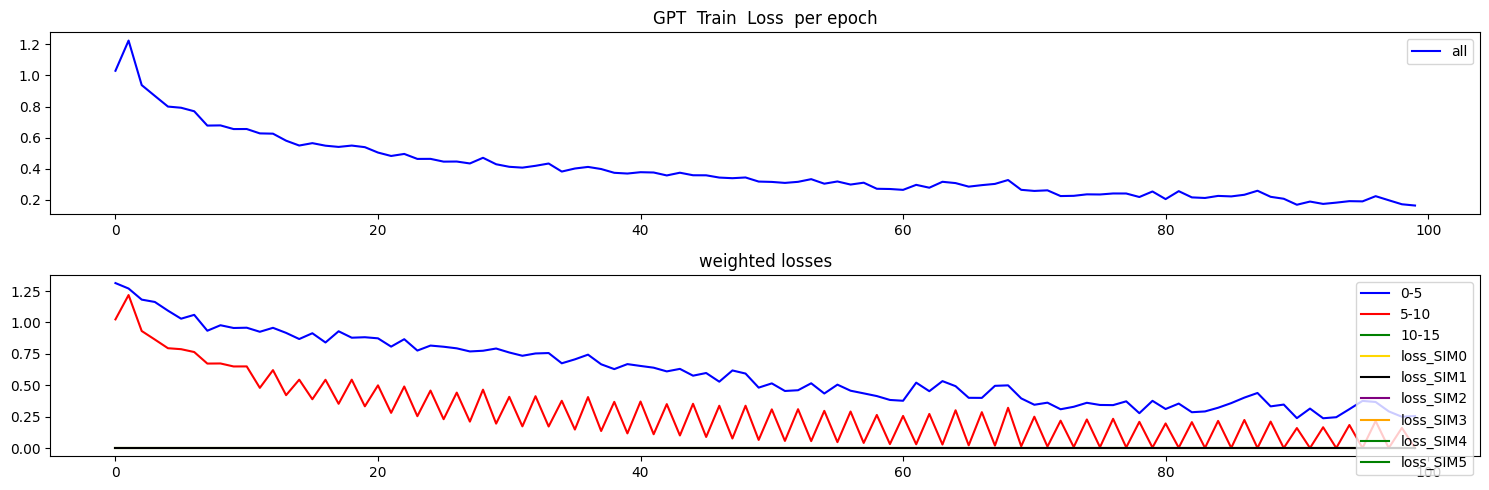

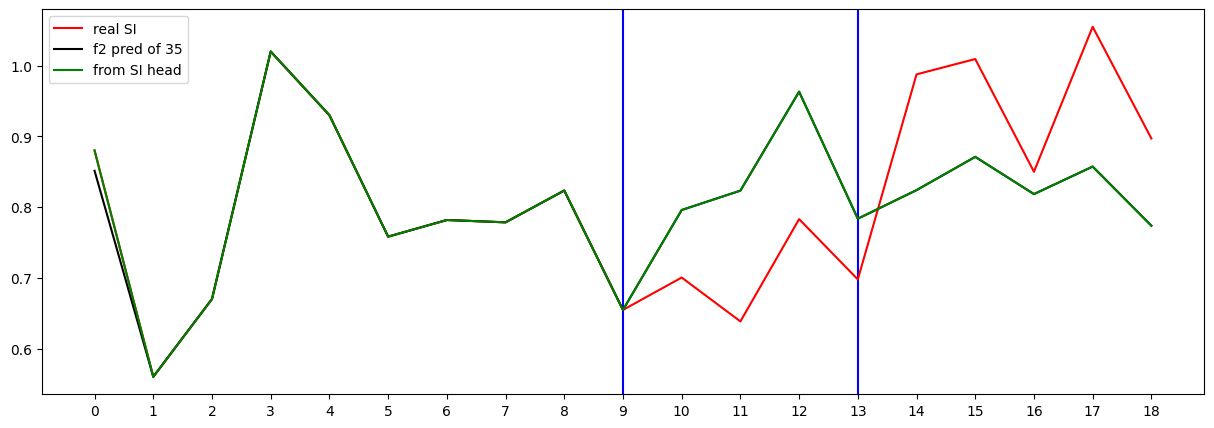

Testing R**2 - (all) - (no inputs):  0.9879428123901344
Testing R**2 - (f2) - SI full (no inputs):  -0.518695775404906
Testing R**2 - SI head only (no inputs):  -0.518695775404906
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -15.034818401179894
3 ...t step R**2 (no inputs):  -0.9018670729148031
4 ...t step R**2 (no inputs):  -0.6291148533437247
5 ...t step R**2 (no inputs):  -0.8261564359217226
6 ...t step R**2 (no inputs):  -0.8297047444265031
7 ...t step R**2 (no inputs):  -0.8290298124187403
8 ...t step R**2 (no inputs):  -0.827059877260359
0 ...index R**2 (no inputs):  -1.4160708153892405
1 ...index R**2 (no inputs):  -2.386672938109287
2 ...index R**2 (no inputs):  -0.518695775404906
3 ...index R**2 (no inputs):  -157.85032540668328
4 ...index R**2 (no inputs):  -0.06759195089802694
5 ...index R**2 (no inputs):  -1.7817319676970054
6 ...index R**2 (no inputs):  -14.925355707840833
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R

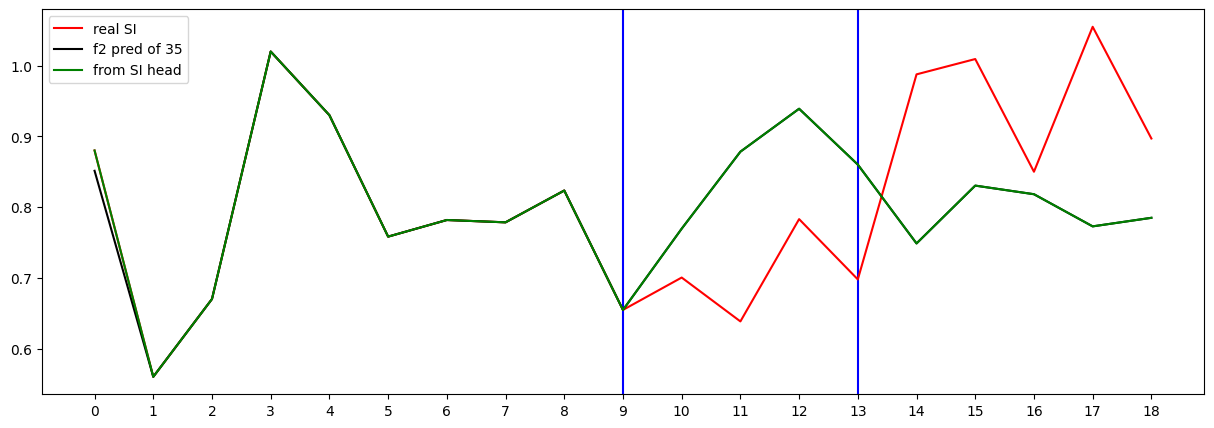

Testing R**2 - (all) - (no inputs):  0.9859943661116402
Testing R**2 - (f2) - SI full (no inputs):  -0.5656596190969347
Testing R**2 - SI head only (no inputs):  -0.5656596190969347
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -15.034818401179894
3 ...t step R**2 (no inputs):  -0.9018670729148031
4 ...t step R**2 (no inputs):  -0.6291148533437247
5 ...t step R**2 (no inputs):  -0.8261564359217226
6 ...t step R**2 (no inputs):  -0.8297047444265031
7 ...t step R**2 (no inputs):  -0.8290298124187403
8 ...t step R**2 (no inputs):  -0.827059877260359
0 ...index R**2 (no inputs):  -0.5440611272566922
1 ...index R**2 (no inputs):  -2.366948836923947
2 ...index R**2 (no inputs):  -0.5656596190969347
3 ...index R**2 (no inputs):  -135.63541697486085
4 ...index R**2 (no inputs):  0.40110589582493683
5 ...index R**2 (no inputs):  -2.2324313907367492
6 ...index R**2 (no inputs):  -23.324471459514807
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk400to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_400to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_400to500.append( res_pred )


[0] Train Loss: 1.161859
Loss_SI: 1.2207077741622925 Loss_all: 1.155366063117981
===
[50] Train Loss: 0.458343
Loss_SI: 0.7721251249313354 Loss_all: 0.45438632369041443
===


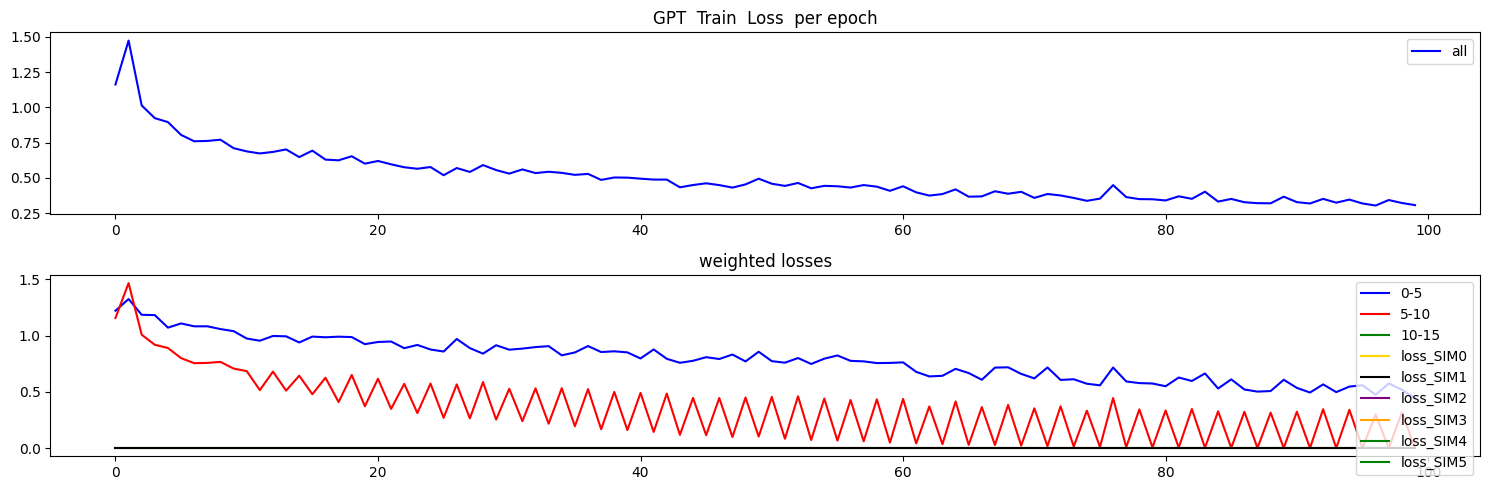

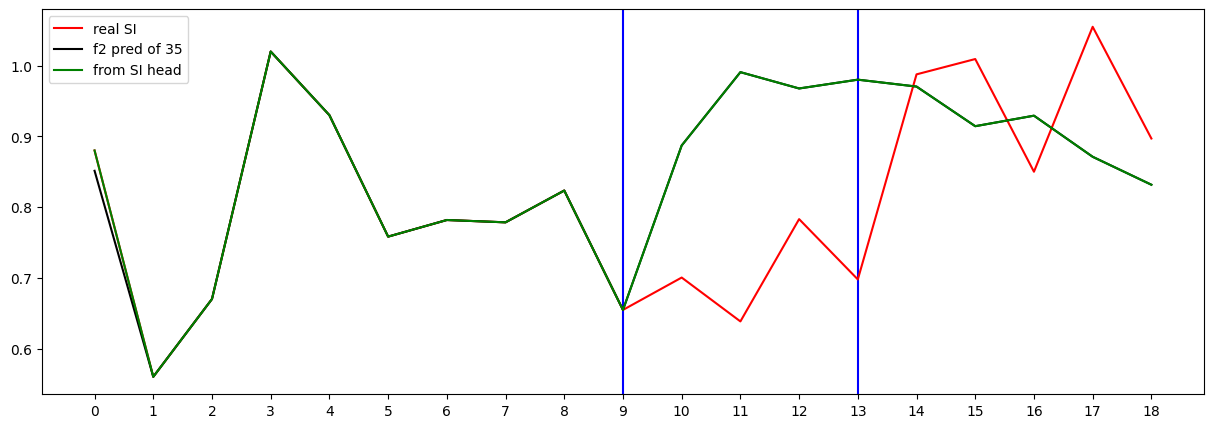

Testing R**2 - (all) - (no inputs):  0.988817794466069
Testing R**2 - (f2) - SI full (no inputs):  -0.26955414474404815
Testing R**2 - SI head only (no inputs):  -0.26955414474404815
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -15.034818401179894
3 ...t step R**2 (no inputs):  -0.9018670729148031
4 ...t step R**2 (no inputs):  -0.6291148533437247
5 ...t step R**2 (no inputs):  -0.8261564359217226
6 ...t step R**2 (no inputs):  -0.8297047444265031
7 ...t step R**2 (no inputs):  -0.8290298124187403
8 ...t step R**2 (no inputs):  -0.827059877260359
0 ...index R**2 (no inputs):  -0.7120060857296786
1 ...index R**2 (no inputs):  -0.5713178445184479
2 ...index R**2 (no inputs):  -0.26955414474404815
3 ...index R**2 (no inputs):  -930.284514774321
4 ...index R**2 (no inputs):  0.41615775534518606
5 ...index R**2 (no inputs):  -1.5269412300612477
6 ...index R**2 (no inputs):  -23.803580516193005
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...inde

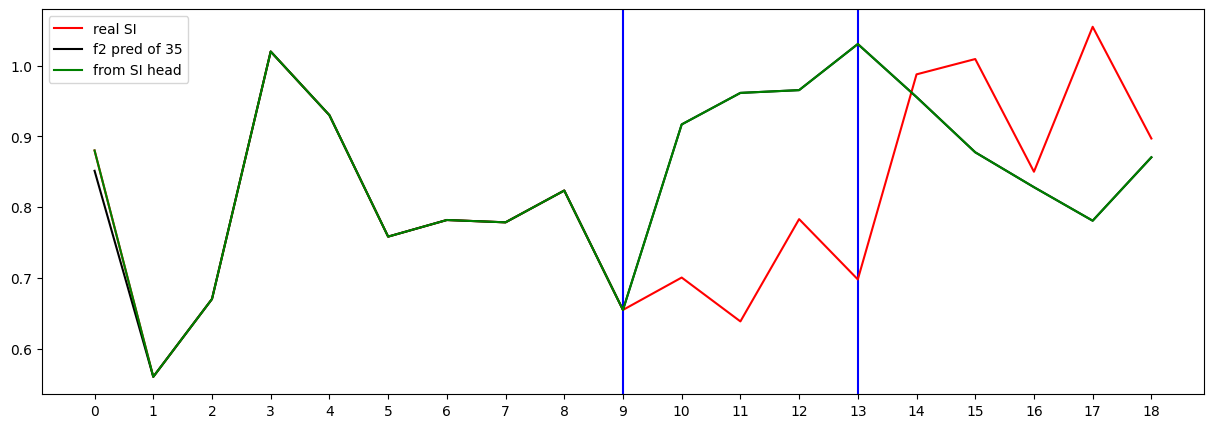

Testing R**2 - (all) - (no inputs):  0.9908705567089455
Testing R**2 - (f2) - SI full (no inputs):  -0.5773248945005964
Testing R**2 - SI head only (no inputs):  -0.5773248945005964
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -15.034818401179894
3 ...t step R**2 (no inputs):  -0.9018670729148031
4 ...t step R**2 (no inputs):  -0.6291148533437247
5 ...t step R**2 (no inputs):  -0.8261564359217226
6 ...t step R**2 (no inputs):  -0.8297047444265031
7 ...t step R**2 (no inputs):  -0.8290298124187403
8 ...t step R**2 (no inputs):  -0.827059877260359
0 ...index R**2 (no inputs):  -0.7140221572882679
1 ...index R**2 (no inputs):  -0.8343312485287171
2 ...index R**2 (no inputs):  -0.5773248945005964
3 ...index R**2 (no inputs):  -268.63640614116696
4 ...index R**2 (no inputs):  -0.43017392680273314
5 ...index R**2 (no inputs):  -1.0294387205736442
6 ...index R**2 (no inputs):  -14.293073597963808
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...ind

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_300to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_300to500.append( res_pred )



[0] Train Loss: 1.304817
Loss_SI: 1.3230539560317993 Loss_all: 1.2986037731170654
===
[50] Train Loss: 0.407162
Loss_SI: 0.6084880232810974 Loss_all: 0.40129953622817993
===


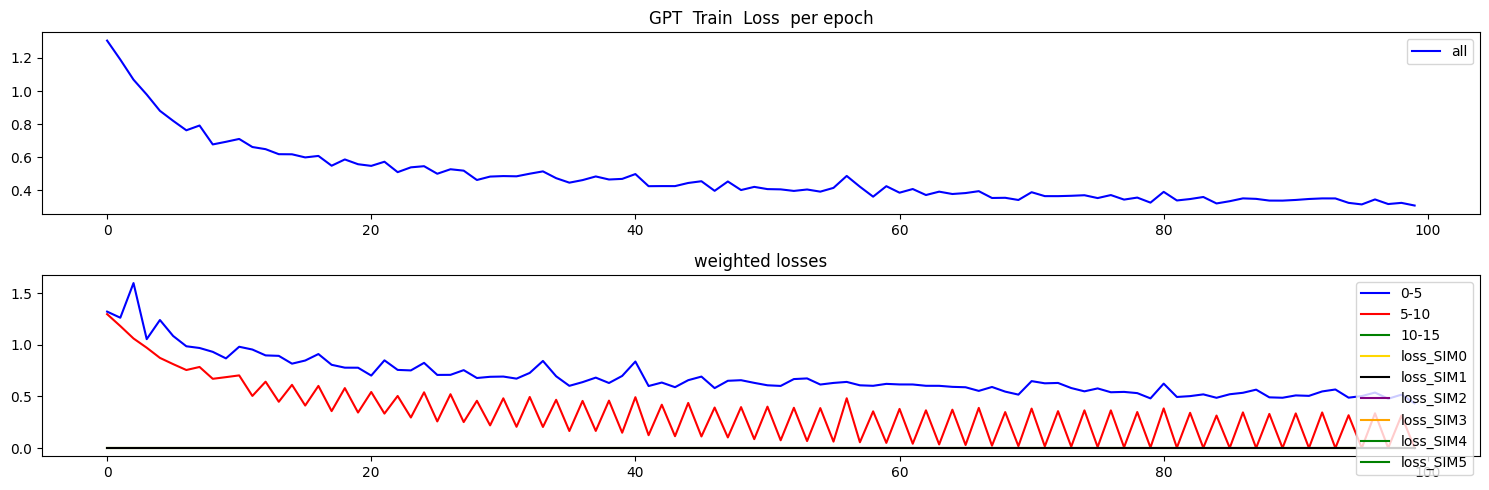

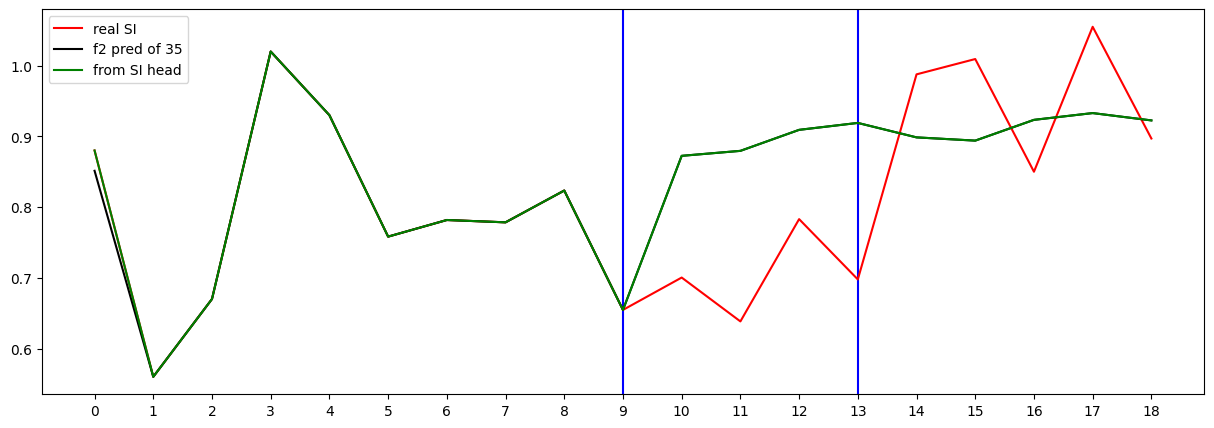

Testing R**2 - (all) - (no inputs):  0.9849024526788588
Testing R**2 - (f2) - SI full (no inputs):  0.07086928749770294
Testing R**2 - SI head only (no inputs):  0.07086928749770294
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -15.034818401179894
3 ...t step R**2 (no inputs):  -0.9018670729148031
4 ...t step R**2 (no inputs):  -0.6291148533437247
5 ...t step R**2 (no inputs):  -0.8261564359217226
6 ...t step R**2 (no inputs):  -0.8297047444265031
7 ...t step R**2 (no inputs):  -0.8290298124187403
8 ...t step R**2 (no inputs):  -0.827059877260359
0 ...index R**2 (no inputs):  -0.23810600356915335
1 ...index R**2 (no inputs):  -0.2640686250954454
2 ...index R**2 (no inputs):  0.07086928749770294
3 ...index R**2 (no inputs):  -2492.412041947252
4 ...index R**2 (no inputs):  0.334498342436758
5 ...index R**2 (no inputs):  -2.4807371482845526
6 ...index R**2 (no inputs):  -0.6768504545248297
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index 

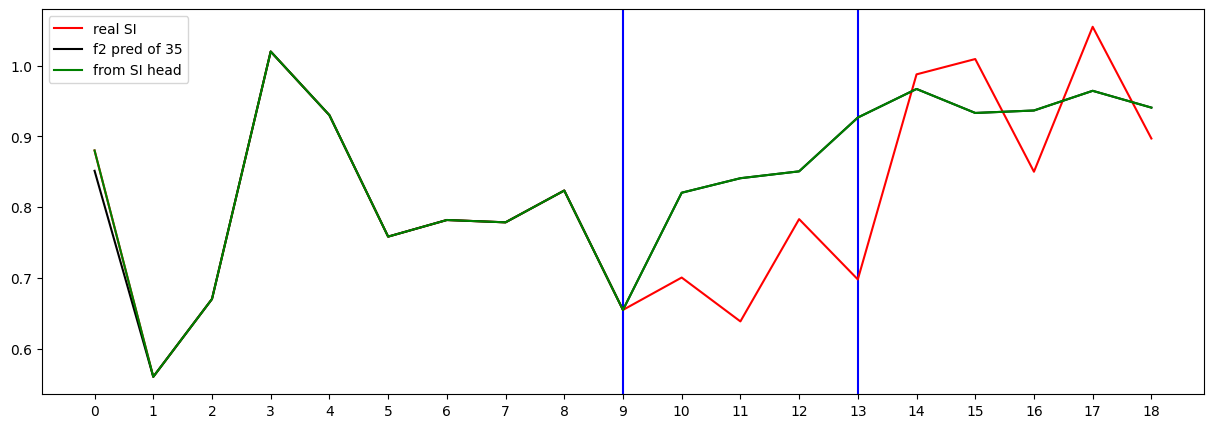

Testing R**2 - (all) - (no inputs):  0.9860689681222781
Testing R**2 - (f2) - SI full (no inputs):  0.4077646106750593
Testing R**2 - SI head only (no inputs):  0.4077646106750593
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -15.034818401179894
3 ...t step R**2 (no inputs):  -0.9018670729148031
4 ...t step R**2 (no inputs):  -0.6291148533437247
5 ...t step R**2 (no inputs):  -0.8261564359217226
6 ...t step R**2 (no inputs):  -0.8297047444265031
7 ...t step R**2 (no inputs):  -0.8290298124187403
8 ...t step R**2 (no inputs):  -0.827059877260359
0 ...index R**2 (no inputs):  -0.22278571210891784
1 ...index R**2 (no inputs):  -0.45577456602850086
2 ...index R**2 (no inputs):  0.4077646106750593
3 ...index R**2 (no inputs):  -3764.7394643538205
4 ...index R**2 (no inputs):  0.24415313108033732
5 ...index R**2 (no inputs):  -2.198692147559933
6 ...index R**2 (no inputs):  0.3072266350759274
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_200to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_200to500.append( res_pred )


[0] Train Loss: 1.300737
Loss_SI: 1.4319074153900146 Loss_all: 1.2943735122680664
===
[50] Train Loss: 0.423717
Loss_SI: 0.6037503480911255 Loss_all: 0.4188019931316376
===


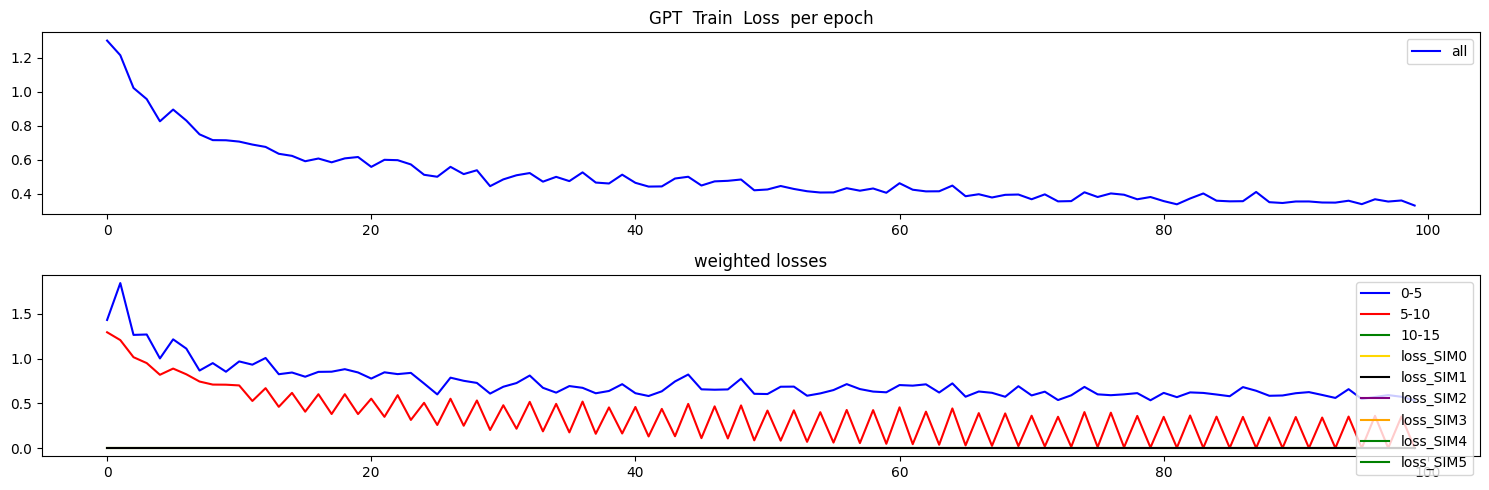

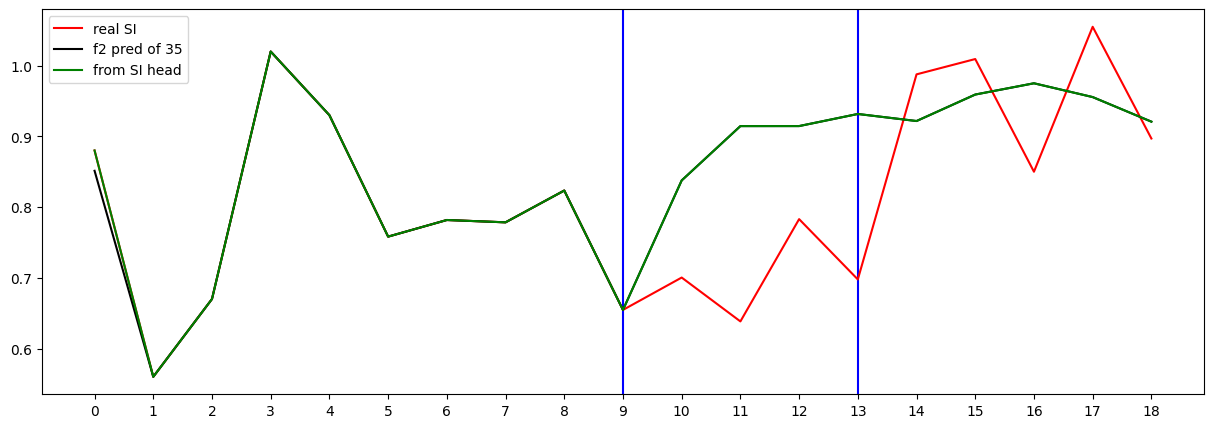

Testing R**2 - (all) - (no inputs):  0.9909538268060251
Testing R**2 - (f2) - SI full (no inputs):  0.13320493304418934
Testing R**2 - SI head only (no inputs):  0.13320493304418934
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -15.034818401179894
3 ...t step R**2 (no inputs):  -0.9018670729148031
4 ...t step R**2 (no inputs):  -0.6291148533437247
5 ...t step R**2 (no inputs):  -0.8261564359217226
6 ...t step R**2 (no inputs):  -0.8297047444265031
7 ...t step R**2 (no inputs):  -0.8290298124187403
8 ...t step R**2 (no inputs):  -0.827059877260359
0 ...index R**2 (no inputs):  -0.7219176452523504
1 ...index R**2 (no inputs):  -0.20150895445163508
2 ...index R**2 (no inputs):  0.13320493304418934
3 ...index R**2 (no inputs):  -3455.7216834197634
4 ...index R**2 (no inputs):  -0.7974558856929681
5 ...index R**2 (no inputs):  -1.0870887426183584
6 ...index R**2 (no inputs):  -2.3810445386567736
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...ind

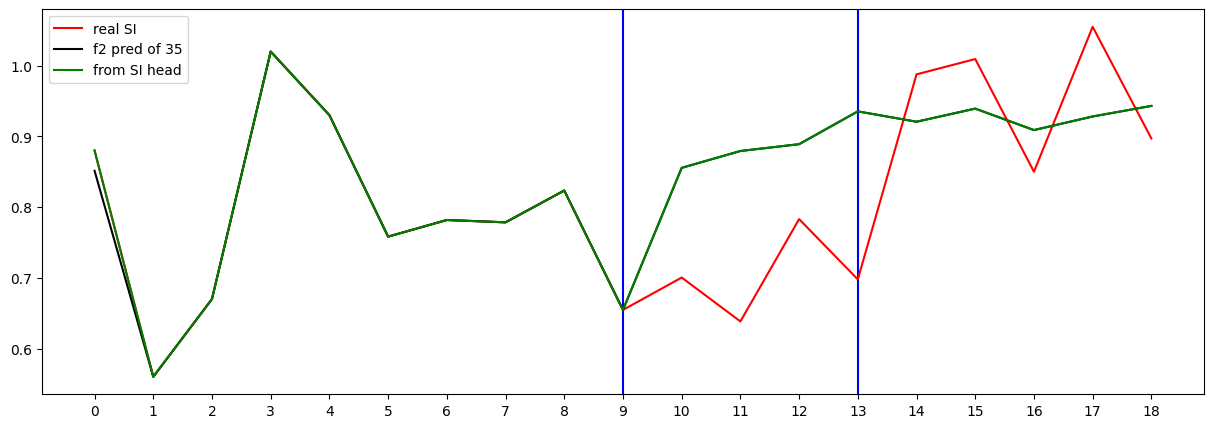

Testing R**2 - (all) - (no inputs):  0.9829988622791149
Testing R**2 - (f2) - SI full (no inputs):  0.13586258389094885
Testing R**2 - SI head only (no inputs):  0.13586258389094885
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -15.034818401179894
3 ...t step R**2 (no inputs):  -0.9018670729148031
4 ...t step R**2 (no inputs):  -0.6291148533437247
5 ...t step R**2 (no inputs):  -0.8261564359217226
6 ...t step R**2 (no inputs):  -0.8297047444265031
7 ...t step R**2 (no inputs):  -0.8290298124187403
8 ...t step R**2 (no inputs):  -0.827059877260359
0 ...index R**2 (no inputs):  -0.5791486348367145
1 ...index R**2 (no inputs):  -0.154763303456676
2 ...index R**2 (no inputs):  0.13586258389094885
3 ...index R**2 (no inputs):  -8243.370875454051
4 ...index R**2 (no inputs):  -0.5834330108180197
5 ...index R**2 (no inputs):  -2.935984583751599
6 ...index R**2 (no inputs):  -1.0660783607257844
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, model_DPO, x_means, x_standard_devs, 9  )
    inferenceGPT_obj.DPO_all_real_si_100to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_100to500.append( res_pred )



[0] Train Loss: 1.331379
Loss_SI: 1.3444302082061768 Loss_all: 1.3249084949493408
===
[50] Train Loss: 0.367566
Loss_SI: 0.4510120451450348 Loss_all: 0.36423012614250183
===


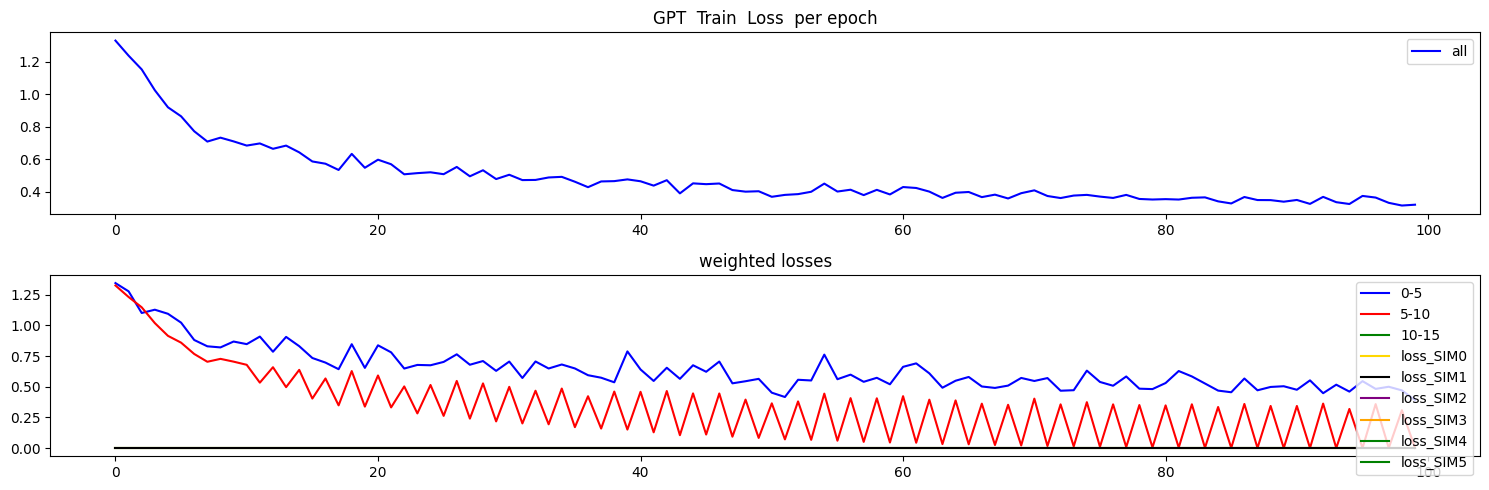

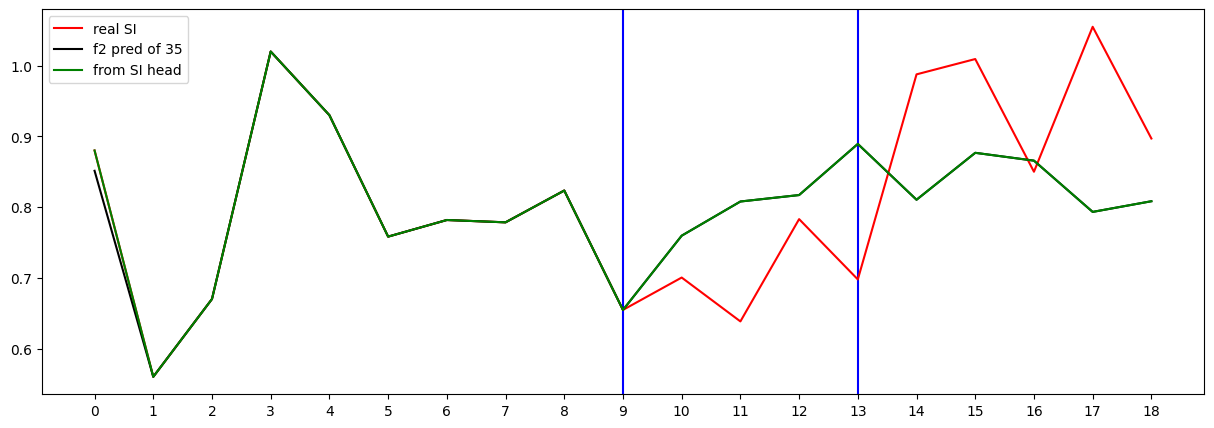

Testing R**2 - (all) - (no inputs):  0.9955706207129721
Testing R**2 - (f2) - SI full (no inputs):  0.17696384336185478
Testing R**2 - SI head only (no inputs):  0.17696384336185478
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -15.034818401179894
3 ...t step R**2 (no inputs):  -0.9018670729148031
4 ...t step R**2 (no inputs):  -0.6291148533437247
5 ...t step R**2 (no inputs):  -0.8261564359217226
6 ...t step R**2 (no inputs):  -0.8297047444265031
7 ...t step R**2 (no inputs):  -0.8290298124187403
8 ...t step R**2 (no inputs):  -0.827059877260359
0 ...index R**2 (no inputs):  -0.3596520260242224
1 ...index R**2 (no inputs):  -1.7548881740341318
2 ...index R**2 (no inputs):  0.17696384336185478
3 ...index R**2 (no inputs):  -1954.7999136028247
4 ...index R**2 (no inputs):  -0.5381002368901628
5 ...index R**2 (no inputs):  0.010940115208046275
6 ...index R**2 (no inputs):  -0.37851040073799047
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...in

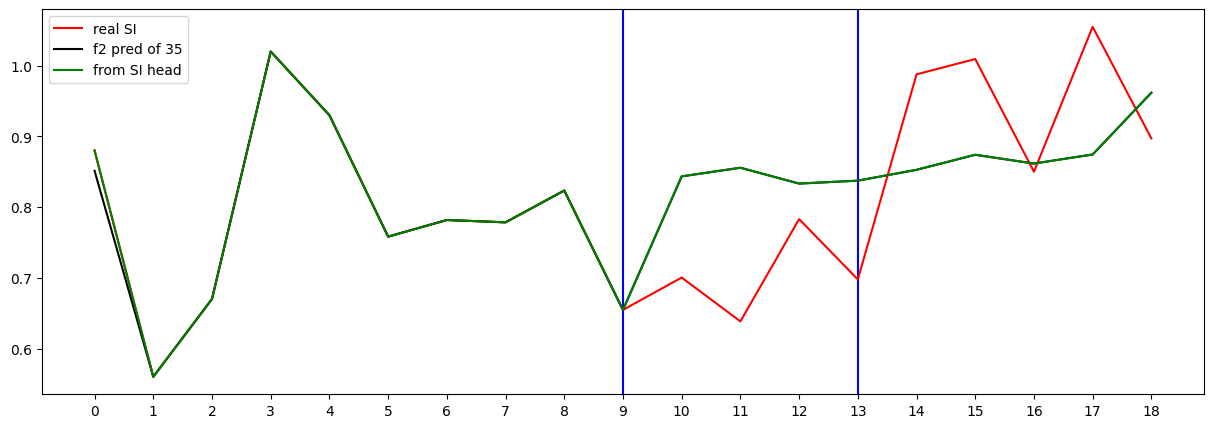

Testing R**2 - (all) - (no inputs):  0.9801064216408434
Testing R**2 - (f2) - SI full (no inputs):  0.009577182556590347
Testing R**2 - SI head only (no inputs):  0.009577182556590347
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -15.034818401179894
3 ...t step R**2 (no inputs):  -0.9018670729148031
4 ...t step R**2 (no inputs):  -0.6291148533437247
5 ...t step R**2 (no inputs):  -0.8261564359217226
6 ...t step R**2 (no inputs):  -0.8297047444265031
7 ...t step R**2 (no inputs):  -0.8290298124187403
8 ...t step R**2 (no inputs):  -0.827059877260359
0 ...index R**2 (no inputs):  -0.4970986409987317
1 ...index R**2 (no inputs):  -0.7647675614432554
2 ...index R**2 (no inputs):  0.009577182556590347
3 ...index R**2 (no inputs):  -2399.504008876615
4 ...index R**2 (no inputs):  -0.971327739437184
5 ...index R**2 (no inputs):  -3.5926275200985947
6 ...index R**2 (no inputs):  -0.09860498431123643
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...in

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_000to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_000to500.append( res_pred )



## Run 3


In [43]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.159619
Loss_SI: 1.4415053129196167 Loss_all: 1.1527758836746216
===
[50] Train Loss: 0.338934
Loss_SI: 0.5181076526641846 Loss_all: 0.33359014987945557
===


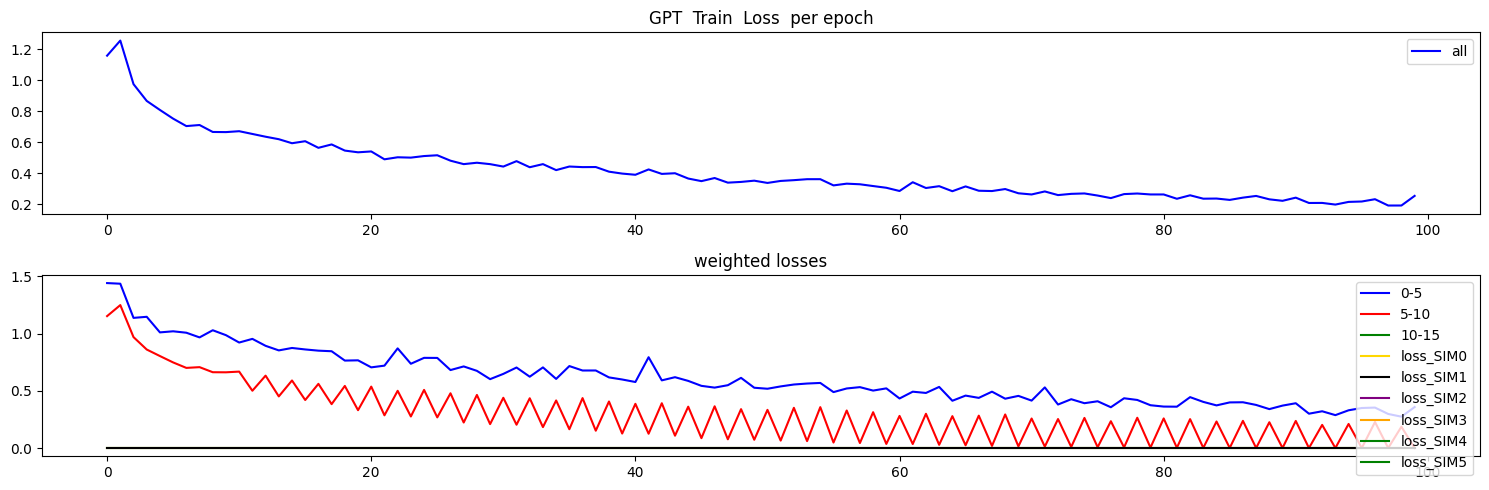

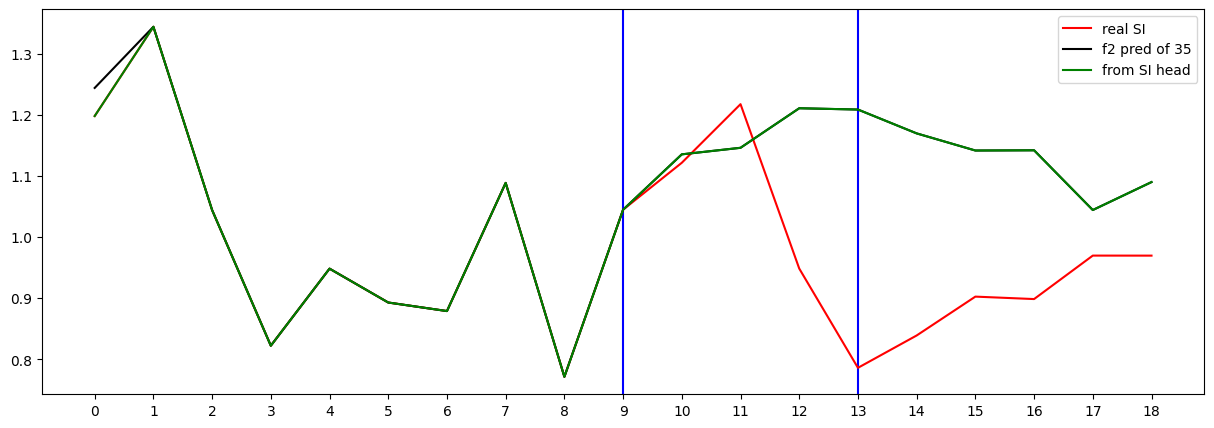

Testing R**2 - (all) - (no inputs):  0.9985306479828072
Testing R**2 - (f2) - SI full (no inputs):  -2.09820409246474
Testing R**2 - SI head only (no inputs):  -2.09820409246474
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.2226661542642057
3 ...t step R**2 (no inputs):  -0.087757944791504
4 ...t step R**2 (no inputs):  -0.11326444923542112
5 ...t step R**2 (no inputs):  -0.015865793947535733
6 ...t step R**2 (no inputs):  0.06431449276981749
7 ...t step R**2 (no inputs):  -0.12624502070993993
8 ...t step R**2 (no inputs):  -0.329695181127289
0 ...index R**2 (no inputs):  -0.27914921199671183
1 ...index R**2 (no inputs):  -4.915070208361568
2 ...index R**2 (no inputs):  -2.09820409246474
3 ...index R**2 (no inputs):  -16.85717280846912
4 ...index R**2 (no inputs):  -51.907163066216
5 ...index R**2 (no inputs):  -5.2629819963680085
6 ...index R**2 (no inputs):  -224.71870400679566
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 

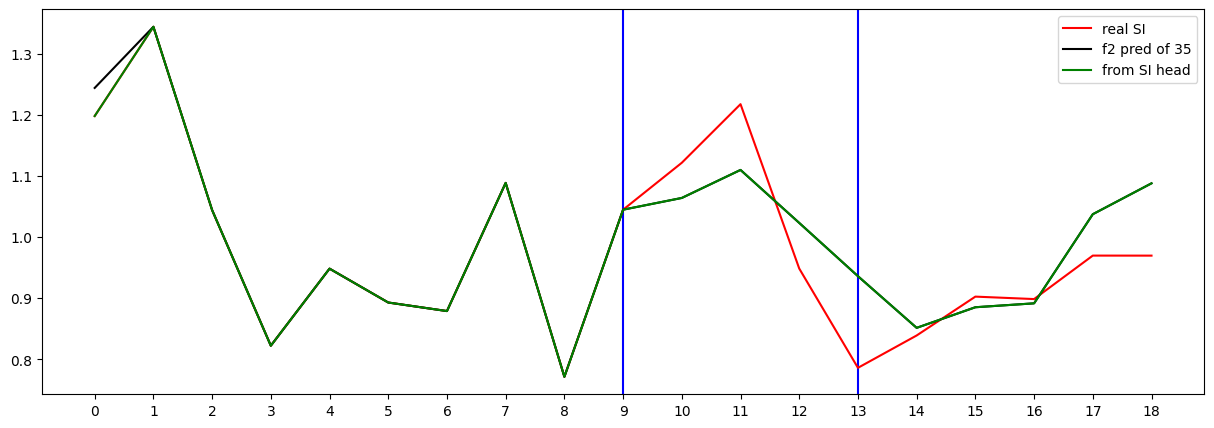

Testing R**2 - (all) - (no inputs):  0.9973491317255767
Testing R**2 - (f2) - SI full (no inputs):  0.19228279802038795
Testing R**2 - SI head only (no inputs):  0.19228279802038795
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.2226661542642057
3 ...t step R**2 (no inputs):  -0.087757944791504
4 ...t step R**2 (no inputs):  -0.11326444923542112
5 ...t step R**2 (no inputs):  -0.015865793947535733
6 ...t step R**2 (no inputs):  0.06431449276981749
7 ...t step R**2 (no inputs):  -0.12624502070993993
8 ...t step R**2 (no inputs):  -0.329695181127289
0 ...index R**2 (no inputs):  -0.49902362631439323
1 ...index R**2 (no inputs):  -1.5403287775000831
2 ...index R**2 (no inputs):  0.19228279802038795
3 ...index R**2 (no inputs):  -9.886316642986989
4 ...index R**2 (no inputs):  -50.17044536331856
5 ...index R**2 (no inputs):  -10.335908272027599
6 ...index R**2 (no inputs):  -336.21501818041617
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...in

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk400to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_400to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_400to500.append( res_pred )


[0] Train Loss: 1.244597
Loss_SI: 1.4410514831542969 Loss_all: 1.238027811050415
===
[50] Train Loss: 0.364488
Loss_SI: 0.3863212764263153 Loss_all: 0.35879018902778625
===


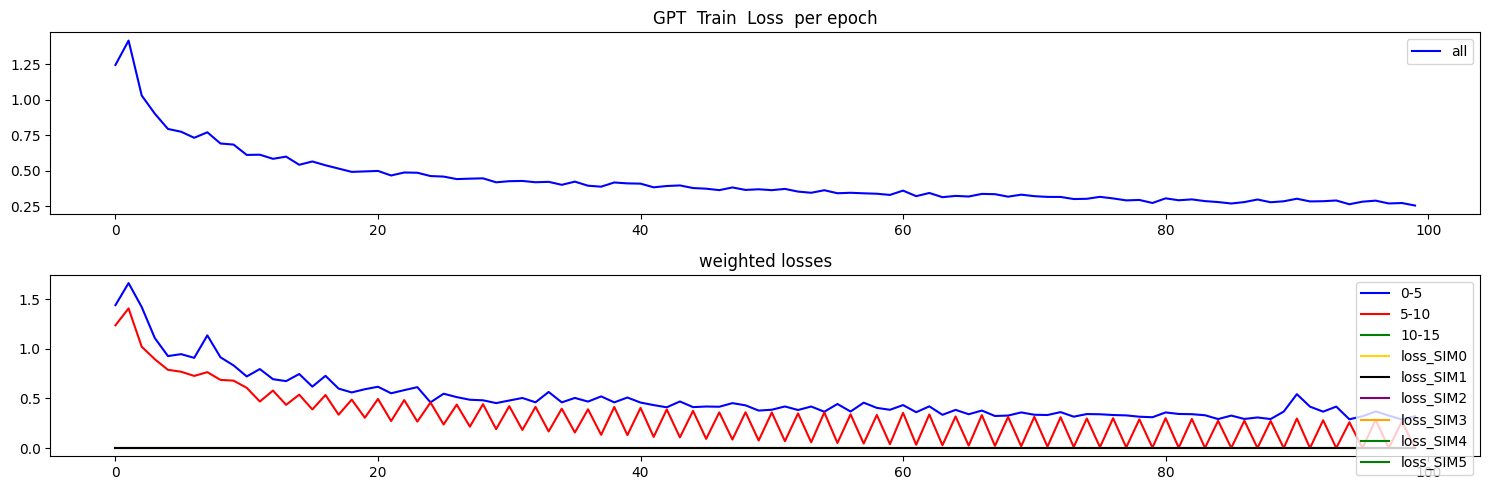

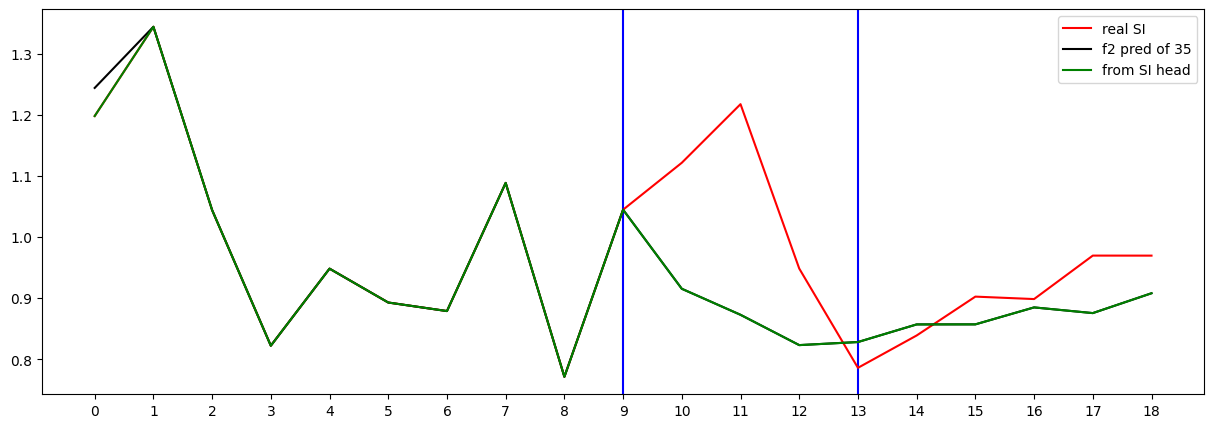

Testing R**2 - (all) - (no inputs):  0.9978578233132861
Testing R**2 - (f2) - SI full (no inputs):  -0.16065437302607544
Testing R**2 - SI head only (no inputs):  -0.16065437302607544
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.2226661542642057
3 ...t step R**2 (no inputs):  -0.087757944791504
4 ...t step R**2 (no inputs):  -0.11326444923542112
5 ...t step R**2 (no inputs):  -0.015865793947535733
6 ...t step R**2 (no inputs):  0.06431449276981749
7 ...t step R**2 (no inputs):  -0.12624502070993993
8 ...t step R**2 (no inputs):  -0.329695181127289
0 ...index R**2 (no inputs):  -0.01753748612397188
1 ...index R**2 (no inputs):  -0.09197014151037597
2 ...index R**2 (no inputs):  -0.16065437302607544
3 ...index R**2 (no inputs):  -221.52759173872147
4 ...index R**2 (no inputs):  -16.27010331473922
5 ...index R**2 (no inputs):  -8.160359072694266
6 ...index R**2 (no inputs):  -117.30380490166698
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 .

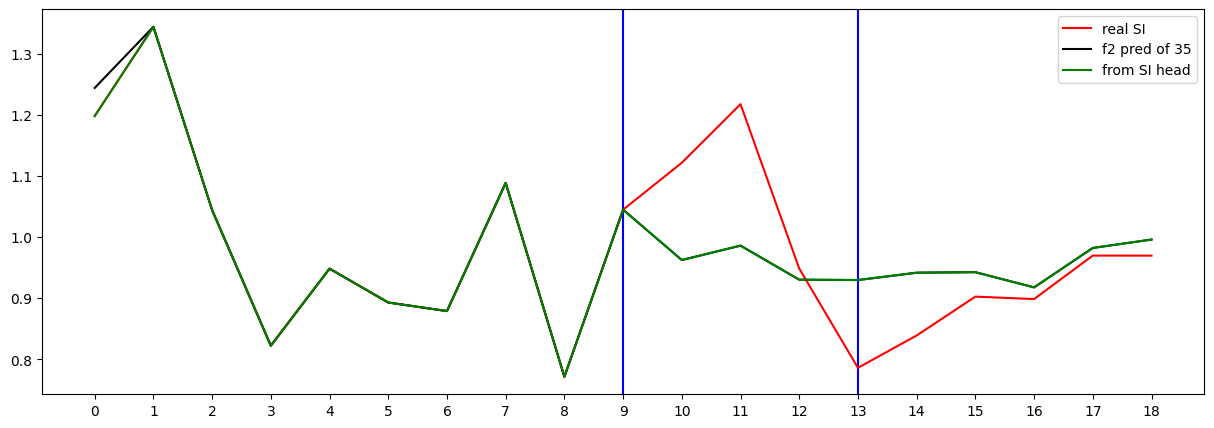

Testing R**2 - (all) - (no inputs):  0.9991575774864023
Testing R**2 - (f2) - SI full (no inputs):  0.18181199372438606
Testing R**2 - SI head only (no inputs):  0.18181199372438606
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.2226661542642057
3 ...t step R**2 (no inputs):  -0.087757944791504
4 ...t step R**2 (no inputs):  -0.11326444923542112
5 ...t step R**2 (no inputs):  -0.015865793947535733
6 ...t step R**2 (no inputs):  0.06431449276981749
7 ...t step R**2 (no inputs):  -0.12624502070993993
8 ...t step R**2 (no inputs):  -0.329695181127289
0 ...index R**2 (no inputs):  -0.09188850069859833
1 ...index R**2 (no inputs):  -0.16991218373504902
2 ...index R**2 (no inputs):  0.18181199372438606
3 ...index R**2 (no inputs):  -929.5260080940378
4 ...index R**2 (no inputs):  -241.1042321164399
5 ...index R**2 (no inputs):  -2.3634541940499307
6 ...index R**2 (no inputs):  -72.49722674195395
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...in

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_300to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_300to500.append( res_pred )



[0] Train Loss: 1.256526
Loss_SI: 1.130462646484375 Loss_all: 1.2502622604370117
===
[50] Train Loss: 0.427774
Loss_SI: 0.5859300494194031 Loss_all: 0.4232272803783417
===


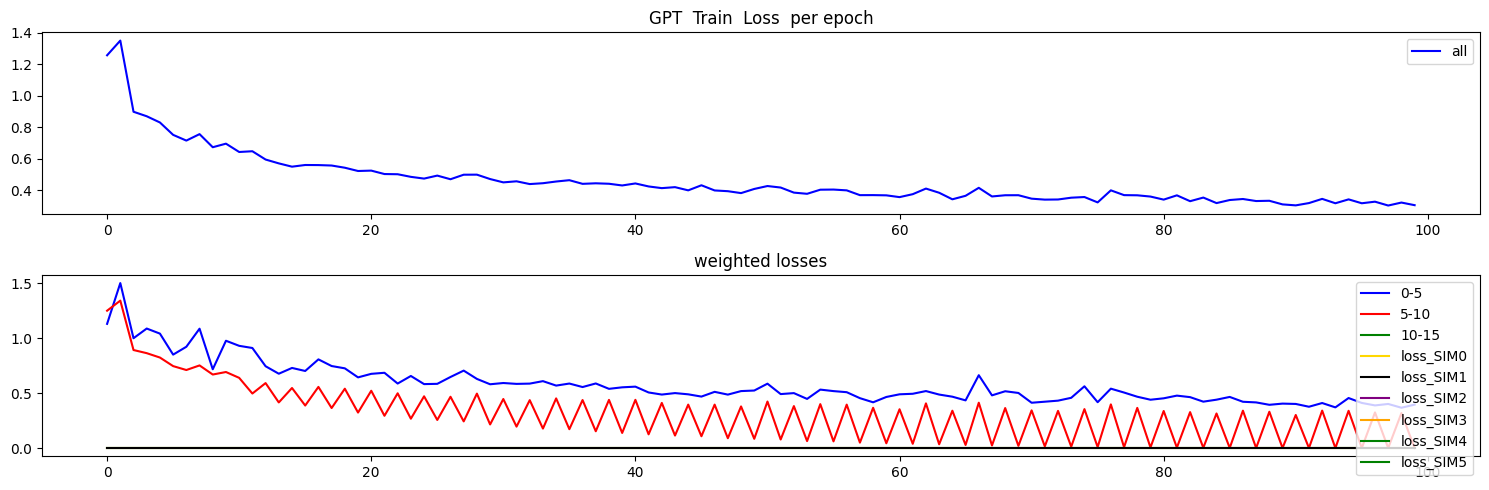

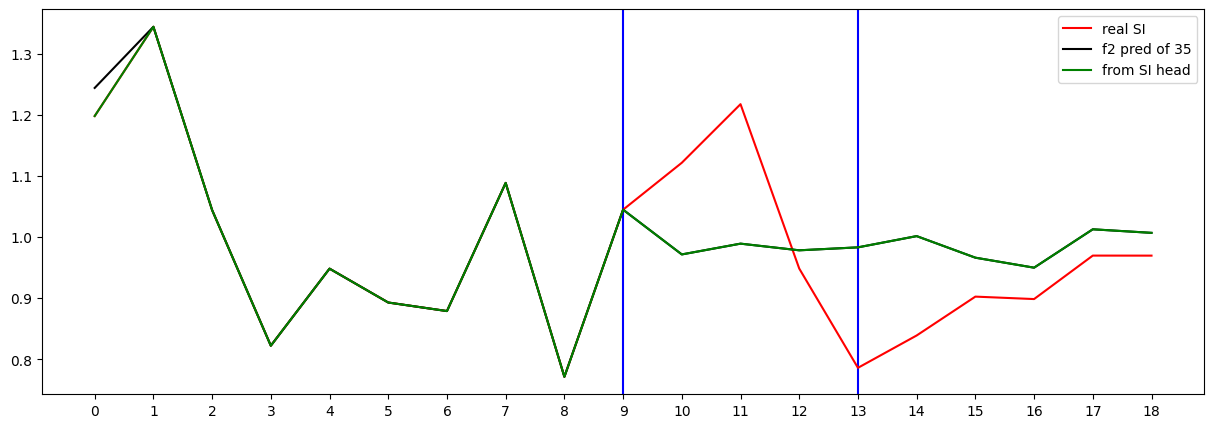

Testing R**2 - (all) - (no inputs):  0.9985144052007171
Testing R**2 - (f2) - SI full (no inputs):  0.00754157326259719
Testing R**2 - SI head only (no inputs):  0.00754157326259719
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.2226661542642057
3 ...t step R**2 (no inputs):  -0.087757944791504
4 ...t step R**2 (no inputs):  -0.11326444923542112
5 ...t step R**2 (no inputs):  -0.015865793947535733
6 ...t step R**2 (no inputs):  0.06431449276981749
7 ...t step R**2 (no inputs):  -0.12624502070993993
8 ...t step R**2 (no inputs):  -0.329695181127289
0 ...index R**2 (no inputs):  -0.1667351050013588
1 ...index R**2 (no inputs):  -0.3146906854120144
2 ...index R**2 (no inputs):  0.00754157326259719
3 ...index R**2 (no inputs):  -187.3979896113701
4 ...index R**2 (no inputs):  -36.20169205292776
5 ...index R**2 (no inputs):  -5.321013098449246
6 ...index R**2 (no inputs):  -111.1278213155763
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index

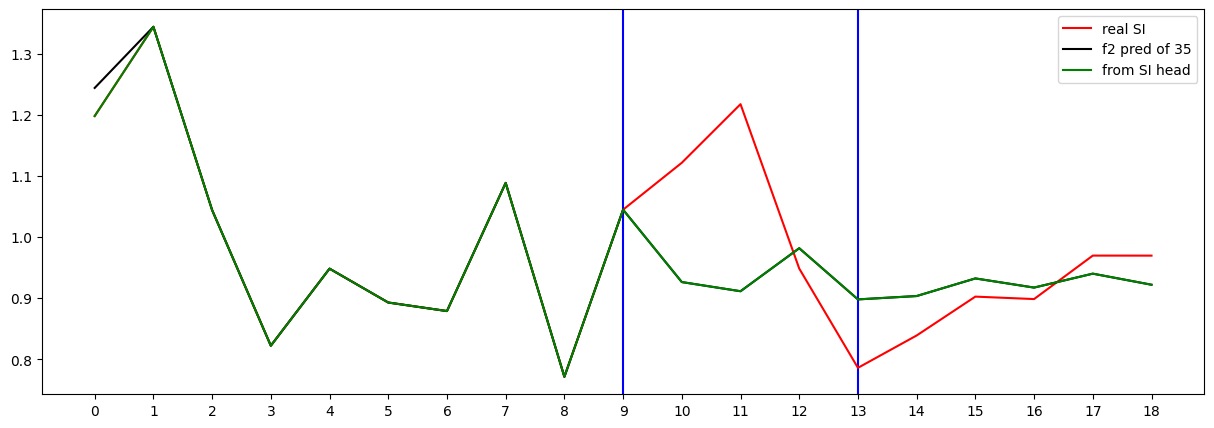

Testing R**2 - (all) - (no inputs):  0.9993298934621422
Testing R**2 - (f2) - SI full (no inputs):  -0.19772826525280762
Testing R**2 - SI head only (no inputs):  -0.19772826525280762
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.2226661542642057
3 ...t step R**2 (no inputs):  -0.087757944791504
4 ...t step R**2 (no inputs):  -0.11326444923542112
5 ...t step R**2 (no inputs):  -0.015865793947535733
6 ...t step R**2 (no inputs):  0.06431449276981749
7 ...t step R**2 (no inputs):  -0.12624502070993993
8 ...t step R**2 (no inputs):  -0.329695181127289
0 ...index R**2 (no inputs):  -0.07652408410754075
1 ...index R**2 (no inputs):  -0.1635113240578996
2 ...index R**2 (no inputs):  -0.19772826525280762
3 ...index R**2 (no inputs):  -186.38268619807673
4 ...index R**2 (no inputs):  -71.26848194641522
5 ...index R**2 (no inputs):  -1.6804717235122864
6 ...index R**2 (no inputs):  -15.54221305284133
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ..

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_200to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_200to500.append( res_pred )


[0] Train Loss: 1.173334
Loss_SI: 1.1641947031021118 Loss_all: 1.166975736618042
===
[50] Train Loss: 0.428044
Loss_SI: 0.6032224893569946 Loss_all: 0.42386752367019653
===


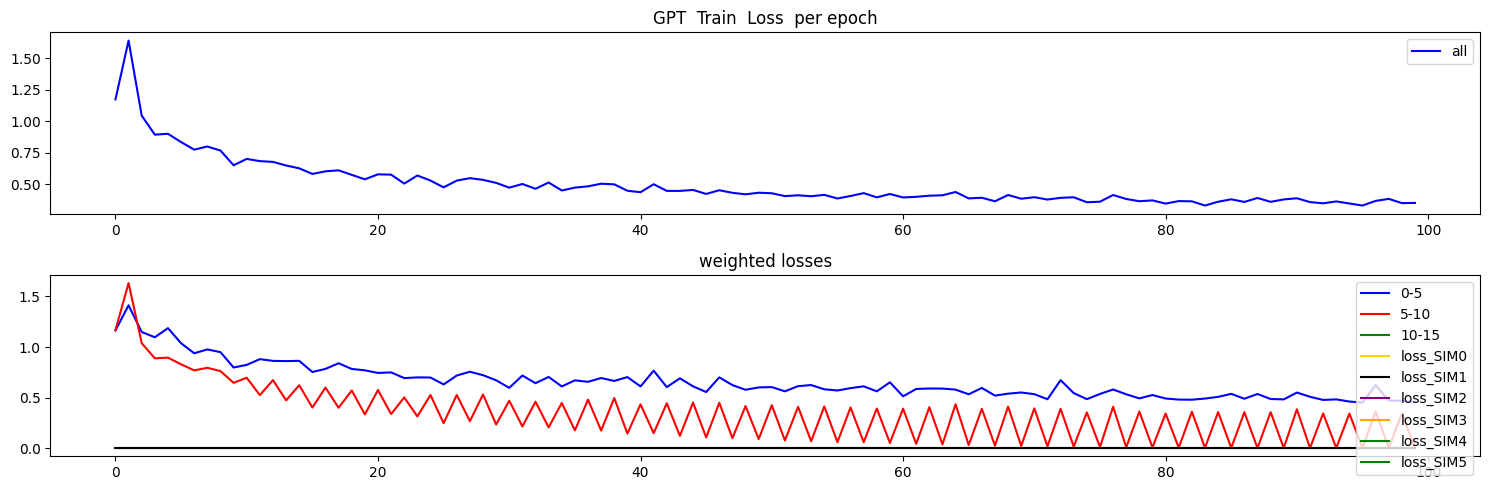

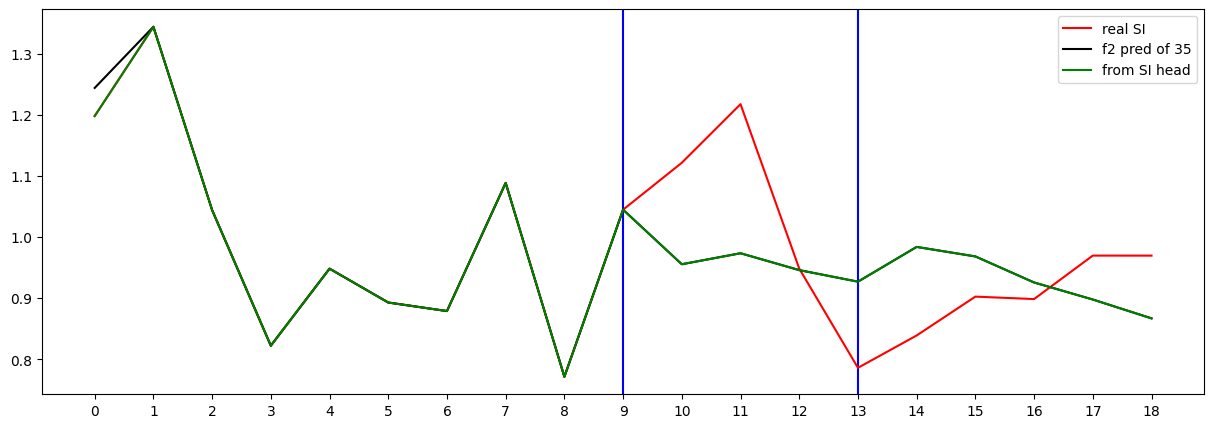

Testing R**2 - (all) - (no inputs):  0.9984514630299448
Testing R**2 - (f2) - SI full (no inputs):  -0.3232503906012245
Testing R**2 - SI head only (no inputs):  -0.3232503906012245
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.2226661542642057
3 ...t step R**2 (no inputs):  -0.087757944791504
4 ...t step R**2 (no inputs):  -0.11326444923542112
5 ...t step R**2 (no inputs):  -0.015865793947535733
6 ...t step R**2 (no inputs):  0.06431449276981749
7 ...t step R**2 (no inputs):  -0.12624502070993993
8 ...t step R**2 (no inputs):  -0.329695181127289
0 ...index R**2 (no inputs):  -0.35348723683060834
1 ...index R**2 (no inputs):  -1.7090200968655243
2 ...index R**2 (no inputs):  -0.3232503906012245
3 ...index R**2 (no inputs):  -481.06009656760324
4 ...index R**2 (no inputs):  -59.60767426360097
5 ...index R**2 (no inputs):  -5.270525022691001
6 ...index R**2 (no inputs):  -1126.4102508218396
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...in

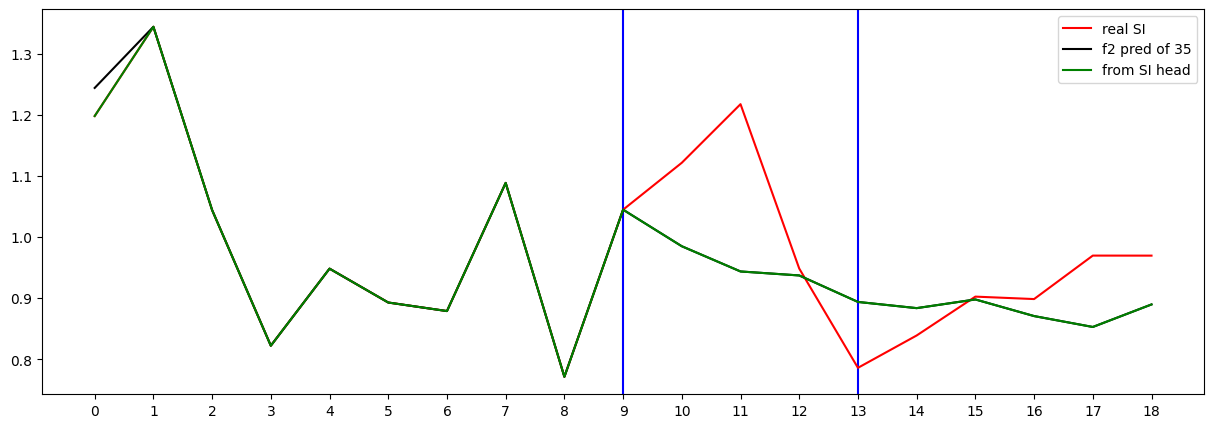

Testing R**2 - (all) - (no inputs):  0.9972584313422084
Testing R**2 - (f2) - SI full (no inputs):  -0.139882689953035
Testing R**2 - SI head only (no inputs):  -0.139882689953035
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.2226661542642057
3 ...t step R**2 (no inputs):  -0.087757944791504
4 ...t step R**2 (no inputs):  -0.11326444923542112
5 ...t step R**2 (no inputs):  -0.015865793947535733
6 ...t step R**2 (no inputs):  0.06431449276981749
7 ...t step R**2 (no inputs):  -0.12624502070993993
8 ...t step R**2 (no inputs):  -0.329695181127289
0 ...index R**2 (no inputs):  0.08337783619052619
1 ...index R**2 (no inputs):  -0.9072487778049516
2 ...index R**2 (no inputs):  -0.139882689953035
3 ...index R**2 (no inputs):  -1814.1032301497971
4 ...index R**2 (no inputs):  -9.475311847209566
5 ...index R**2 (no inputs):  -10.434779962725132
6 ...index R**2 (no inputs):  -1575.619601131734
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index 

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_100to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_100to500.append( res_pred )
    
    
    

[0] Train Loss: 1.222971
Loss_SI: 1.3297725915908813 Loss_all: 1.2166739702224731
===
[50] Train Loss: 0.404219
Loss_SI: 0.5884644389152527 Loss_all: 0.4004032611846924
===


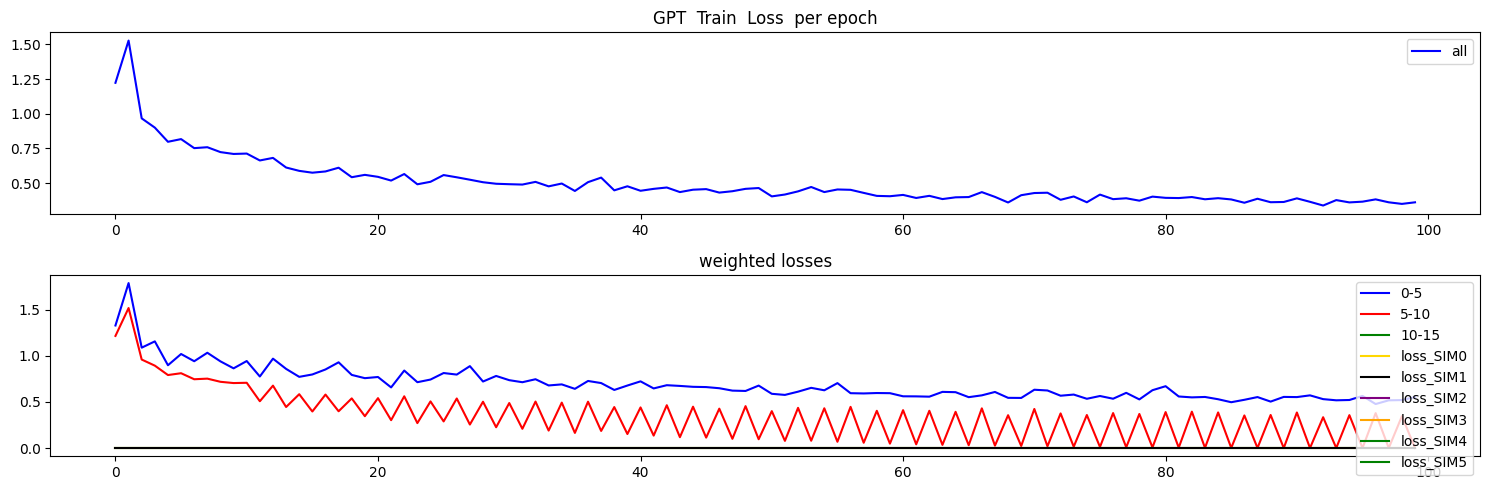

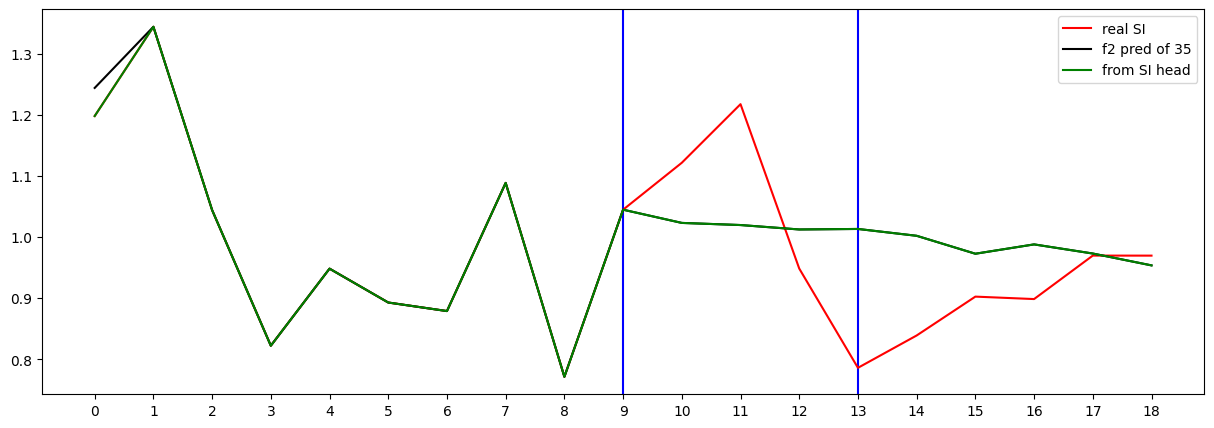

Testing R**2 - (all) - (no inputs):  0.99894199303849
Testing R**2 - (f2) - SI full (no inputs):  -0.14666960196582846
Testing R**2 - SI head only (no inputs):  -0.14666960196582846
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.2226661542642057
3 ...t step R**2 (no inputs):  -0.087757944791504
4 ...t step R**2 (no inputs):  -0.11326444923542112
5 ...t step R**2 (no inputs):  -0.015865793947535733
6 ...t step R**2 (no inputs):  0.06431449276981749
7 ...t step R**2 (no inputs):  -0.12624502070993993
8 ...t step R**2 (no inputs):  -0.329695181127289
0 ...index R**2 (no inputs):  -0.21013575292047593
1 ...index R**2 (no inputs):  -1.0966480975649024
2 ...index R**2 (no inputs):  -0.14666960196582846
3 ...index R**2 (no inputs):  -1182.286658833534
4 ...index R**2 (no inputs):  -98.48423073357499
5 ...index R**2 (no inputs):  -3.4451387673842815
6 ...index R**2 (no inputs):  -83.31975392718222
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...in

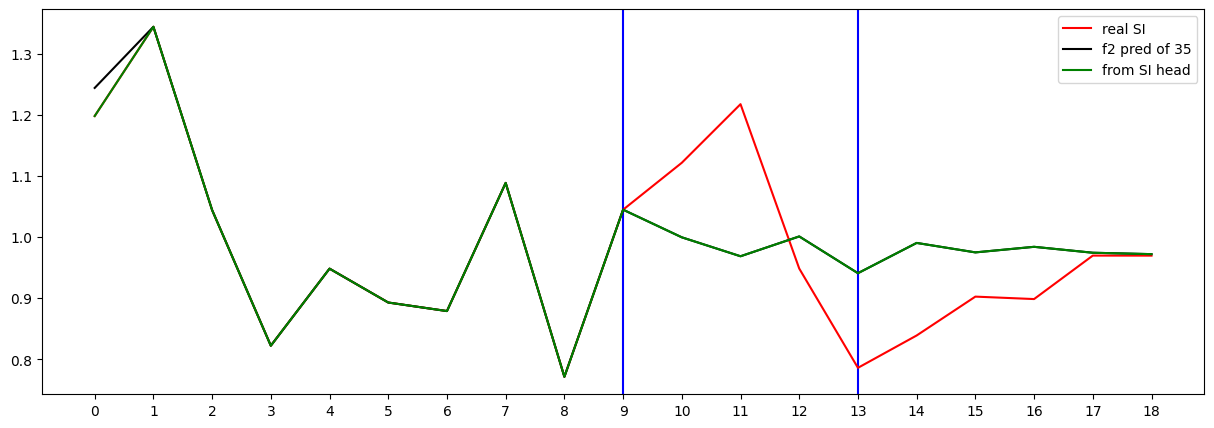

Testing R**2 - (all) - (no inputs):  0.997682115769802
Testing R**2 - (f2) - SI full (no inputs):  0.028872261139035293
Testing R**2 - SI head only (no inputs):  0.028872261139035293
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.2226661542642057
3 ...t step R**2 (no inputs):  -0.087757944791504
4 ...t step R**2 (no inputs):  -0.11326444923542112
5 ...t step R**2 (no inputs):  -0.015865793947535733
6 ...t step R**2 (no inputs):  0.06431449276981749
7 ...t step R**2 (no inputs):  -0.12624502070993993
8 ...t step R**2 (no inputs):  -0.329695181127289
0 ...index R**2 (no inputs):  -0.05147367196213182
1 ...index R**2 (no inputs):  -0.80351600746814
2 ...index R**2 (no inputs):  0.028872261139035293
3 ...index R**2 (no inputs):  -1388.2203425652415
4 ...index R**2 (no inputs):  -46.28114270099898
5 ...index R**2 (no inputs):  -8.967720373888538
6 ...index R**2 (no inputs):  -52.279819002356874
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...in

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to500_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_000to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_000to500.append( res_pred )




## R2 over accumulated Runs


In [49]:

inferenceGPT_obj.print_ALL_R2s_THE_END()

inferenceGPT_obj.DPO_print_ALL_R2s_THE_END()


====================================400to500
1 400to500...1.....................R² on first n steps - R²: 0.8112272404931796
Naive_R2:....................................R²: 0.9233
..A..400to500..1Naive_R2:....................................R² 0.9232537746429443
RMSE:0.1028,MAE:0.0840,MASE:0.1959
1 400to500...1.......................R² on just step n - R²: 0.8112272404931796
Naive_R2:....................................R²: 0.9233
..B..400to500..1Naive_R2:....................................R² 0.9232537746429443
RMSE:0.1028,MAE:0.0840,MASE:0.1959
2 400to500...2.....................R² on first n steps - R²: 0.44425222110998563
Naive_R2:....................................R²: 0.7223
..A..400to500..2Naive_R2:....................................R² 0.7223404943943024
RMSE:0.1317,MAE:0.1113,MASE:0.4734
2 400to500...2.......................R² on just step n - R²: -3.1395965280183047
Naive_R2:....................................R²: -0.3815
..B..400to500..2Naive_R2:.............................

In [50]:

summary = inferenceGPT_obj.summarize_eval_log()


pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


summary


Metric  \
0         400to500...1.....................R² on first n steps - R²:   
1    ..A..400to500..1Naive_R2:....................................R²   
2                                         ..A..400to500..1...RMSE...   
3                                          ..A..400to500..1...MAE...   
4                                         ..A..400to500..1...MASE...   
5         400to500...1.......................R² on just step n - R²:   
6    ..B..400to500..1Naive_R2:....................................R²   
7                                         ..B..400to500..1...RMSE...   
8                                          ..B..400to500..1...MAE...   
9                                         ..B..400to500..1...MASE...   
10        400to500...2.....................R² on first n steps - R²:   
11   ..A..400to500..2Naive_R2:....................................R²   
12                                        ..A..400to500..2...RMSE...   
13                                         ..A..400to500..2...MAE...   
14                                        ..A..400to500..2...MASE...   
15        400to500...2.......................R² on just step n - R²:   
16   ..B..400to500..2Naive_R2:....................................R²   
17                                        ..B..400to500..2...RMSE...   
18                                         ..B..400to500..2...MAE...   
19                                        ..B..400to500..2...MASE...   
20        400to500...3.....................R² on first n steps - R²:   
21   ..A..400to500..3Naive_R2:....................................R²   
22                                        ..A..400to500..3...RMSE...   
23                                         ..A..400to500..3...MAE...   
24                                        ..A..400to500..3...MASE...   
25        400to500...3.......................R² on just step n - R²:   
26   ..B..400to500..3Naive_R2:....................................R²   
27                                        ..B..400to500..3...RMSE...   
28                                         ..B..400to500..3...MAE...   
29                                        ..B..400to500..3...MASE...   
30        400to500...4.....................R² on first n steps - R²:   
31   ..A..400to500..4Naive_R2:....................................R²   
32                                        ..A..400to500..4...RMSE...   
33                                         ..A..400to500..4...MAE...   
34                                        ..A..400to500..4...MASE...   
35        400to500...4.......................R² on just step n - R²:   
36   ..B..400to500..4Naive_R2:....................................R²   
37                                        ..B..400to500..4...RMSE...   
38                                         ..B..400to500..4...MAE...   
39                                        ..B..400to500..4...MASE...   
40        400to500...5.....................R² on first n steps - R²:   
41   ..A..400to500..5Naive_R2:....................................R²   
42                                        ..A..400to500..5...RMSE...   
43                                         ..A..400to500..5...MAE...   
44                                        ..A..400to500..5...MASE...   
45        400to500...5.......................R² on just step n - R²:   
46   ..B..400to500..5Naive_R2:....................................R²   
47                                        ..B..400to500..5...RMSE...   
48                                         ..B..400to500..5...MAE...   
49                                        ..B..400to500..5...MASE...   
50        400to500...6.....................R² on first n steps - R²:   
51   ..A..400to500..6Naive_R2:....................................R²   
52                                        ..A..400to500..6...RMSE...   
53                                         ..A..400to500..6...MAE...   
54                                        ..A..400to500..6...MASE...   
55        400to500...6........

In [51]:

df = summary

# Assuming your DataFrame is called `df` and has a column named "Better"
total_rows = len(df)
after_wins = (df["Better"] == "After").sum()

percent_after = 100 * after_wins / total_rows

print(f"✅ 'After' was better in {after_wins} out of {total_rows} rows.")
print(f"📊 That’s {percent_after:.2f}% of the metrics.")



✅ 'After' was better in 301 out of 450 rows.
📊 That’s 66.89% of the metrics.



## Post Analysis


In [52]:

import metricsPOSTdebriefDF

metricsPOSTdebriefDF.metricsPOSTdebrief_main(df)


400to500...1 to 4
✅ 'After' was better in 30 out of 40 rows.
📊 That’s 75.00% of the metrics.
400to500...5 to 9
✅ 'After' was better in 47 out of 50 rows.
📊 That’s 94.00% of the metrics.
300to500...1 to 4
✅ 'After' was better in 28 out of 40 rows.
📊 That’s 70.00% of the metrics.
300to500...5 to 9
✅ 'After' was better in 41 out of 50 rows.
📊 That’s 82.00% of the metrics.
200to500...1 to 4
✅ 'After' was better in 40 out of 40 rows.
📊 That’s 100.00% of the metrics.
200to500...5 to 9
✅ 'After' was better in 40 out of 50 rows.
📊 That’s 80.00% of the metrics.
100to500...1 to 4
✅ 'After' was better in 29 out of 40 rows.
📊 That’s 72.50% of the metrics.
100to500...5 to 9
✅ 'After' was better in 28 out of 50 rows.
📊 That’s 56.00% of the metrics.
000to500...1 to 4
✅ 'After' was better in 15 out of 40 rows.
📊 That’s 37.50% of the metrics.
000to500...5 to 9
✅ 'After' was better in 3 out of 50 rows.
📊 That’s 6.00% of the metrics.
